In [12]:
import sys
import os
sys.path.append(os.getcwd() + '/../')

from dataset_utils import *
from main_nusc import data_path
import pandas as pd
from ast import literal_eval

save_path = '../runs'
#run = 'indigo-boat'
#run = 'allegro-skillset'
run = 'quadratic-burger'
filename = 'products.csv'

results_file = os.path.join(save_path, run, 'results', filename)

df = pd.read_csv(results_file)

In [13]:
len(actions)
actions

['stop',
 'back',
 'drive straight',
 'accelerate',
 'decelerate',
 'turn left',
 'turn right',
 'uturn',
 'change lane left',
 'change lane right',
 'overtake',
 'END',
 None]

In [14]:
accs = []
T_actions = np.zeros(len(actions))
F_actions = np.zeros(len(actions))
for idx in range(len(df)):
    item = df.iloc[idx]
    past_len = item['past_len']

    gt = literal_eval(item['gt_seq'])

    pred = literal_eval(item['prediction'])

    mask = [gt[i] == pred[i] for i in range(past_len, len(pred))]
    total = len(mask)
    correct = mask.count(True)
    acc = correct/total
    accs.append(acc)

    for i,a in enumerate(gt[past_len:len(pred)]):
        act_idx = actions_dict[a]
        if mask[i]:
            T_actions[act_idx] += 1
        else:
            F_actions[act_idx] += 1

total_actions = T_actions + F_actions
mean_actions = T_actions/total_actions

classes_acc = {actions[i]:mean_actions[i] for i in range(len(actions))}
print(classes_acc)
print(np.mean(np.array(accs)))

{'stop': 0.31626120358514725, 'back': 0.0, 'drive straight': 0.5652467883705207, 'accelerate': 0.17473395125300378, 'decelerate': 0.1725721784776903, 'turn left': 0.0, 'turn right': 0.0, 'uturn': nan, 'change lane left': 0.0, 'change lane right': 0.0, 'overtake': 0.0, 'END': 0.013888888888888888, None: nan}
0.23472757095992008


/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


: 

/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/muyang/nuscenes_action_segmentation/notebooks/../dataset_utils.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


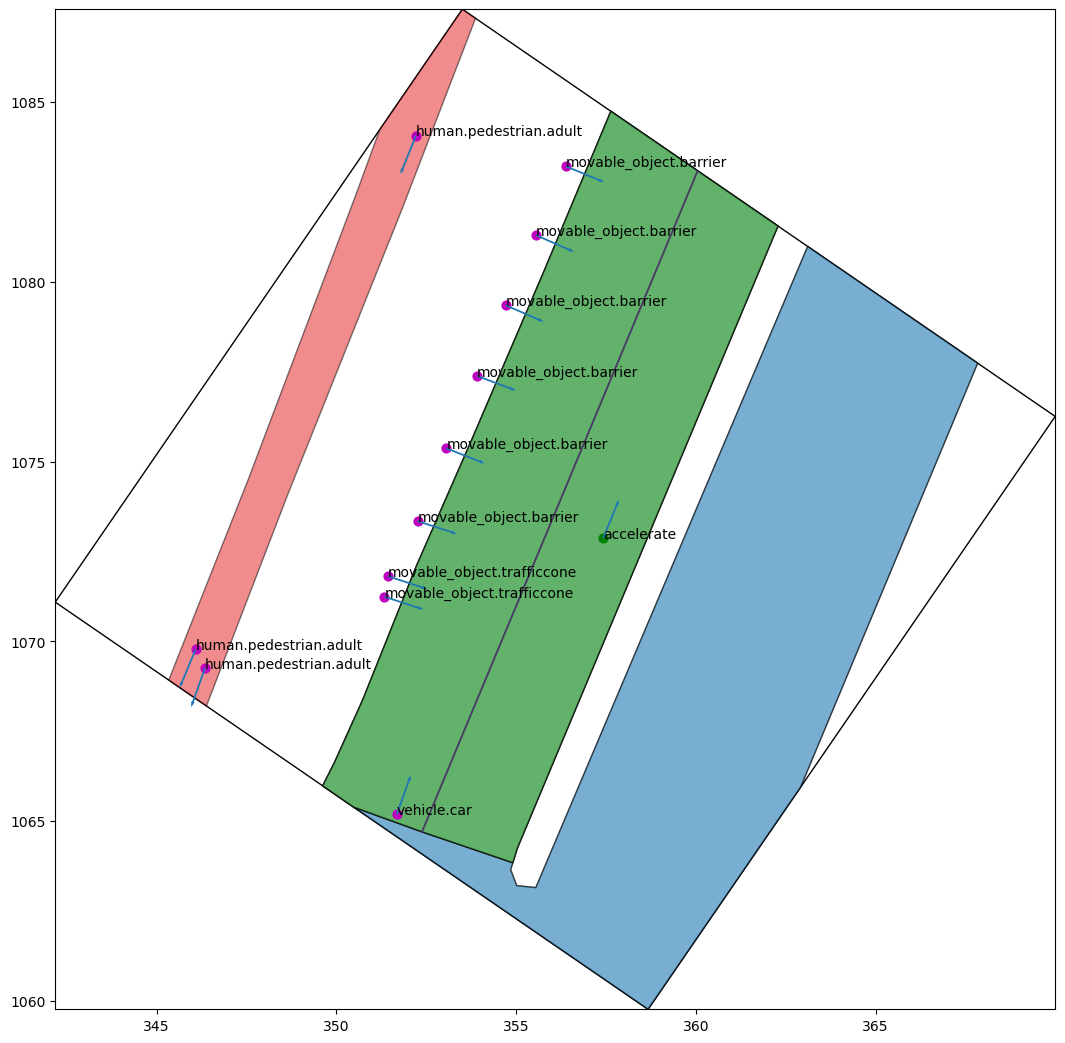

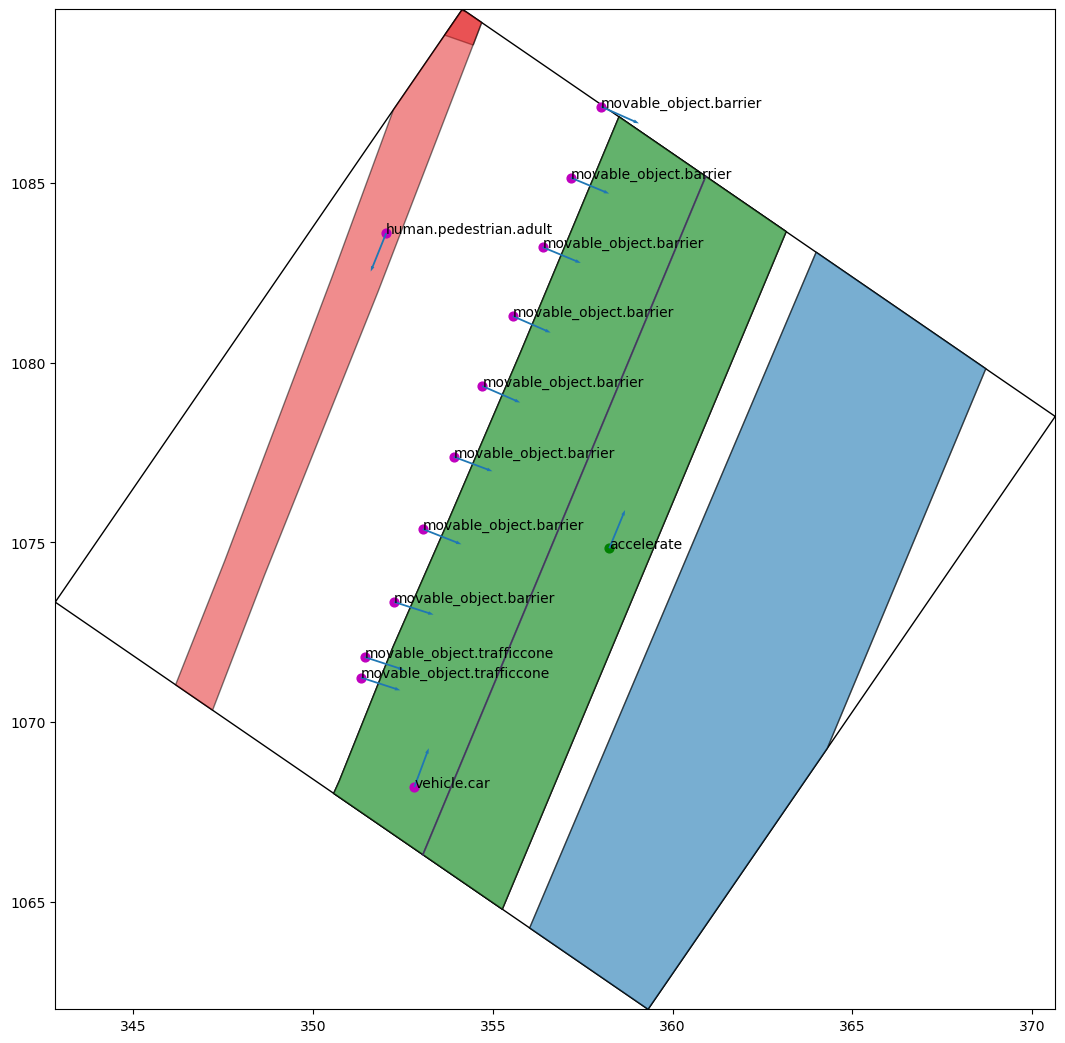

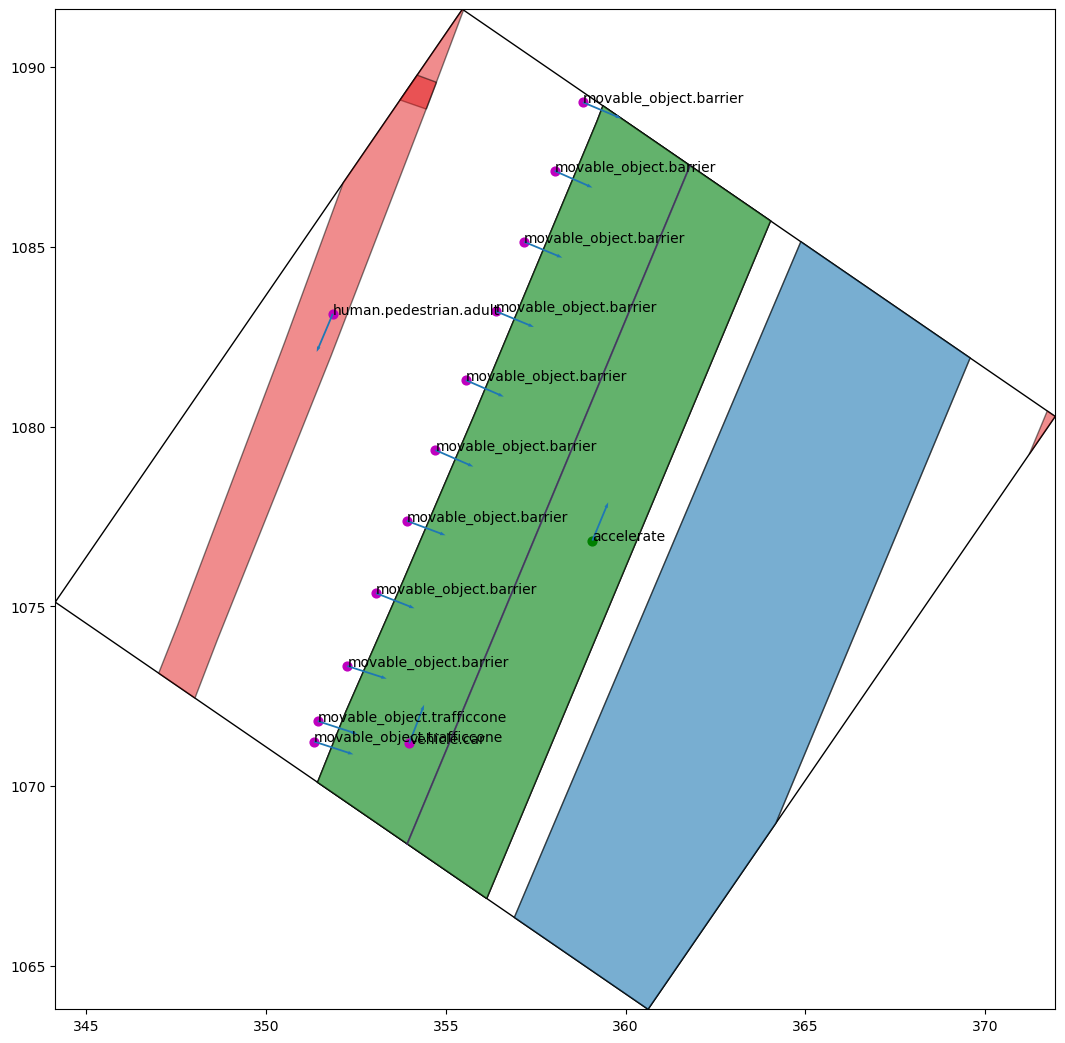

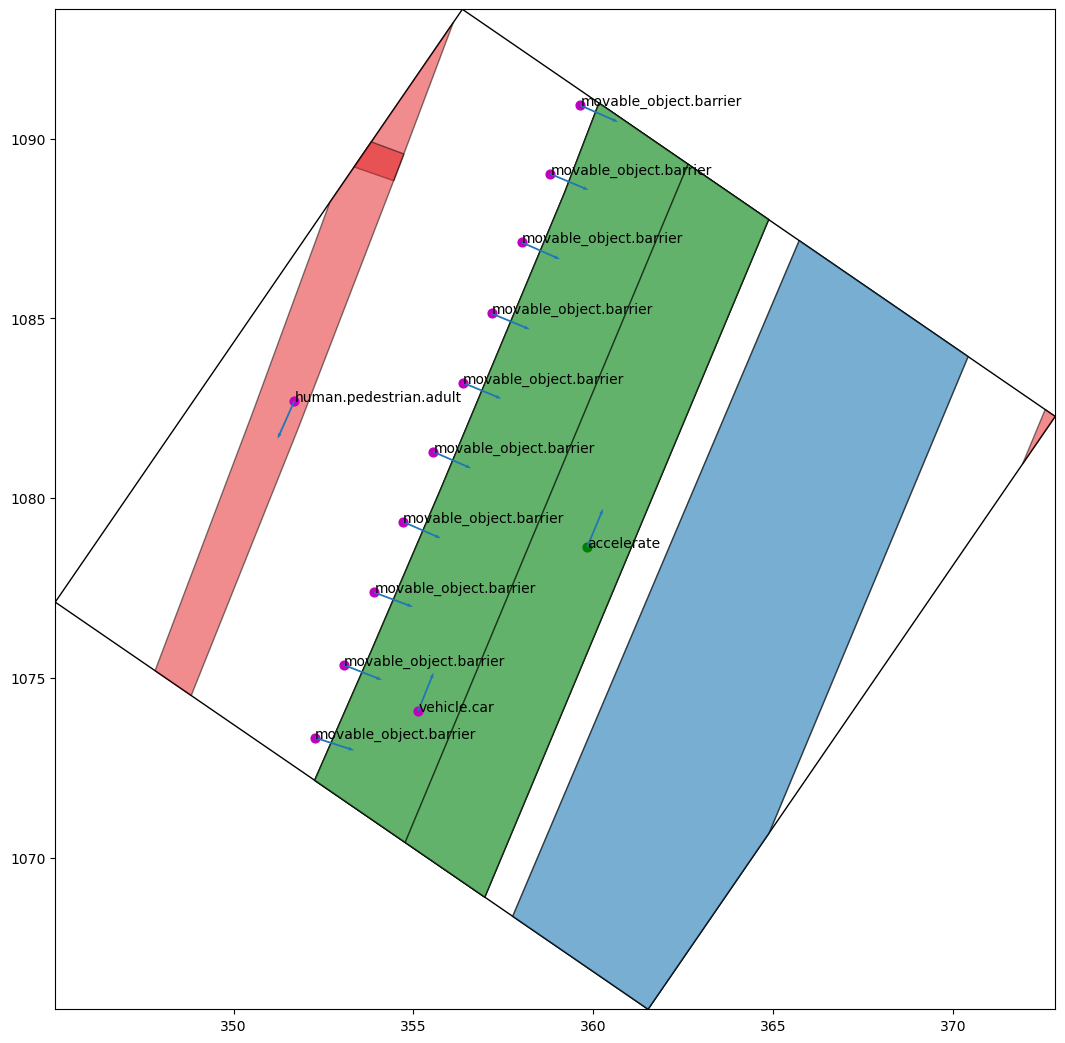

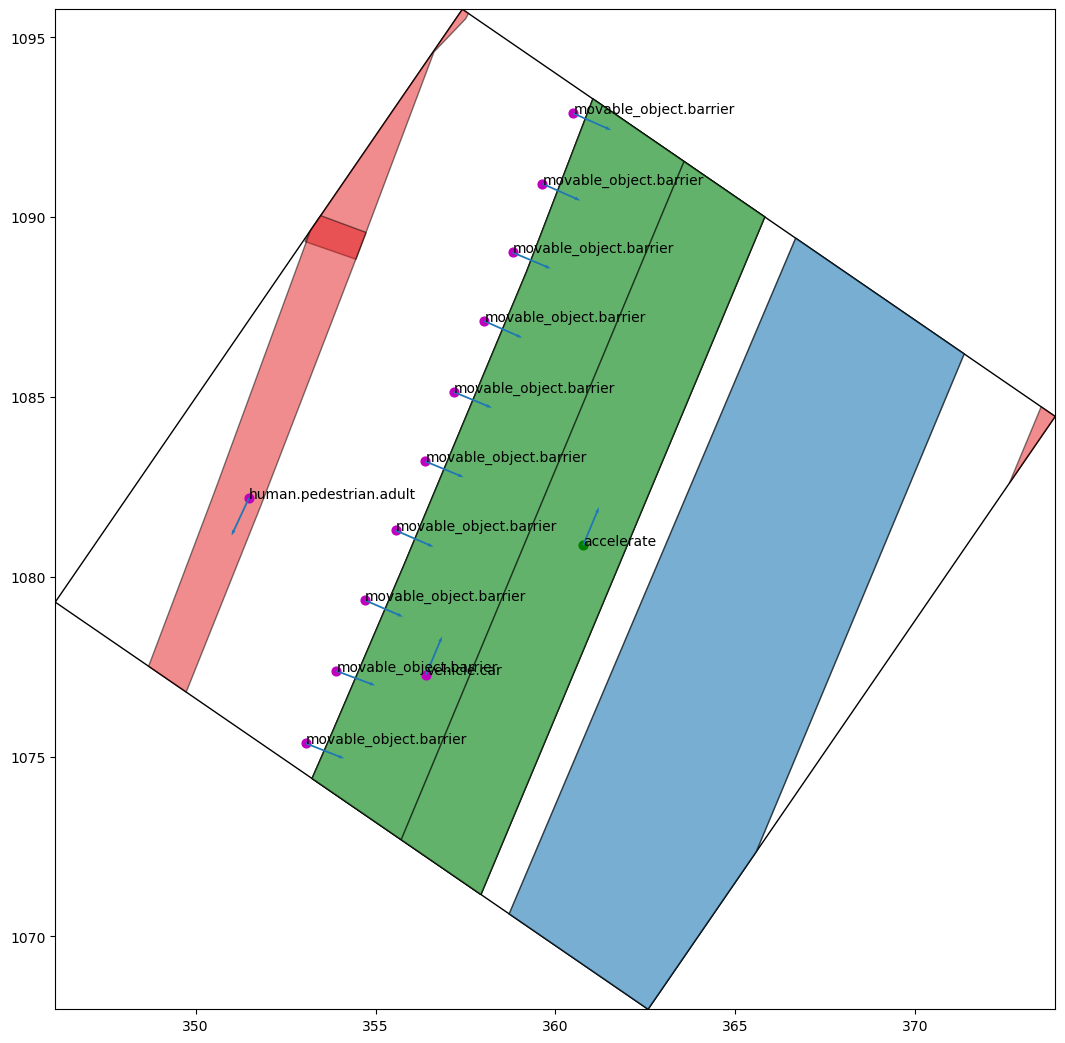

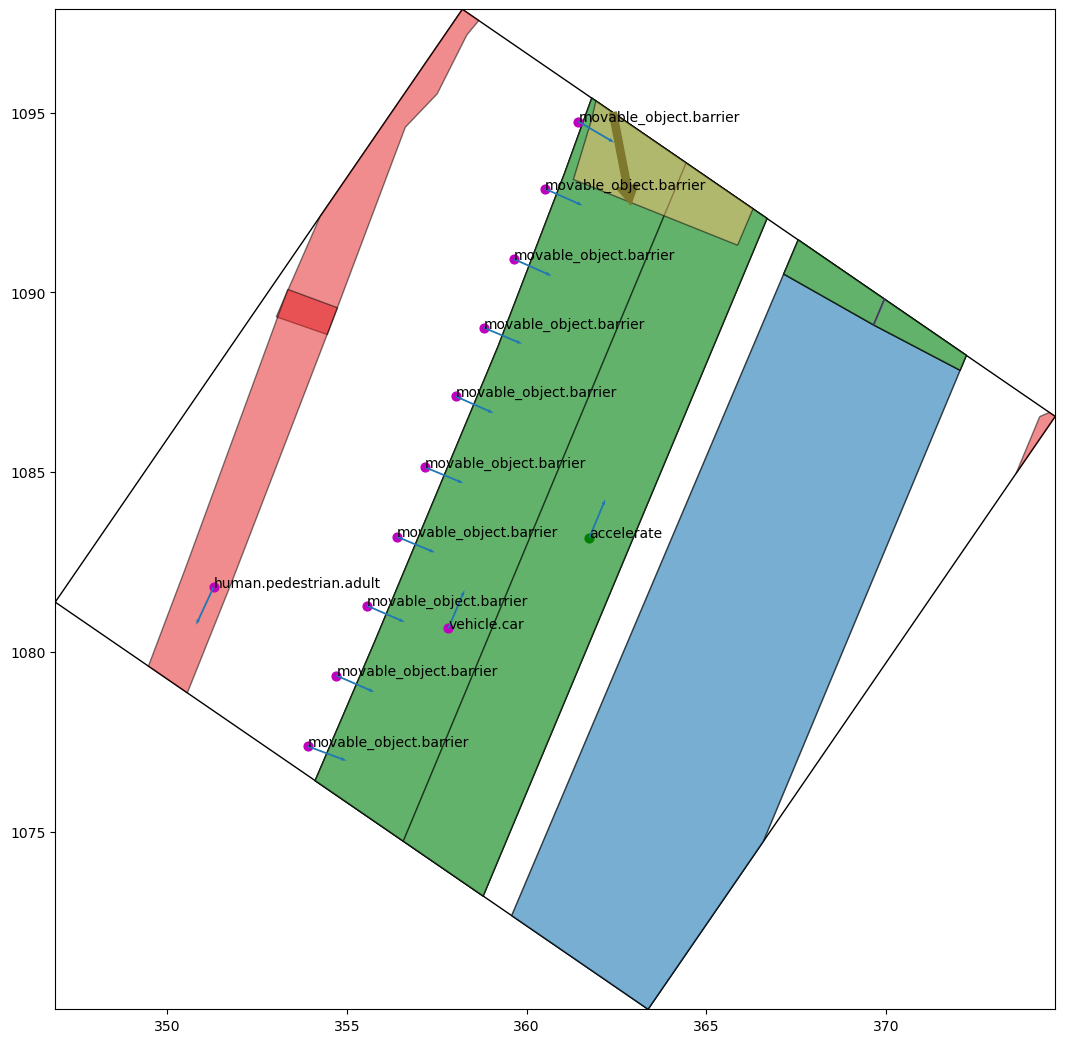

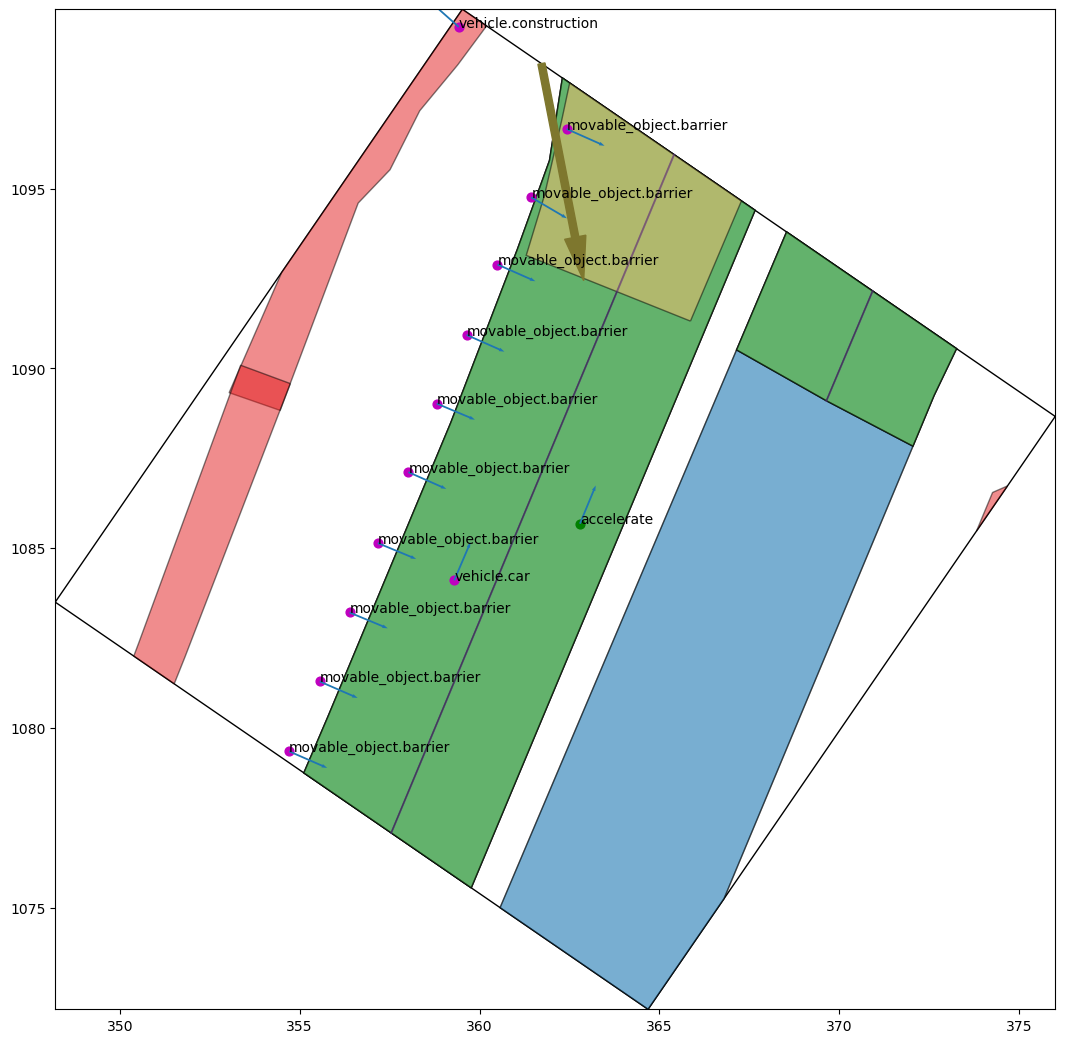

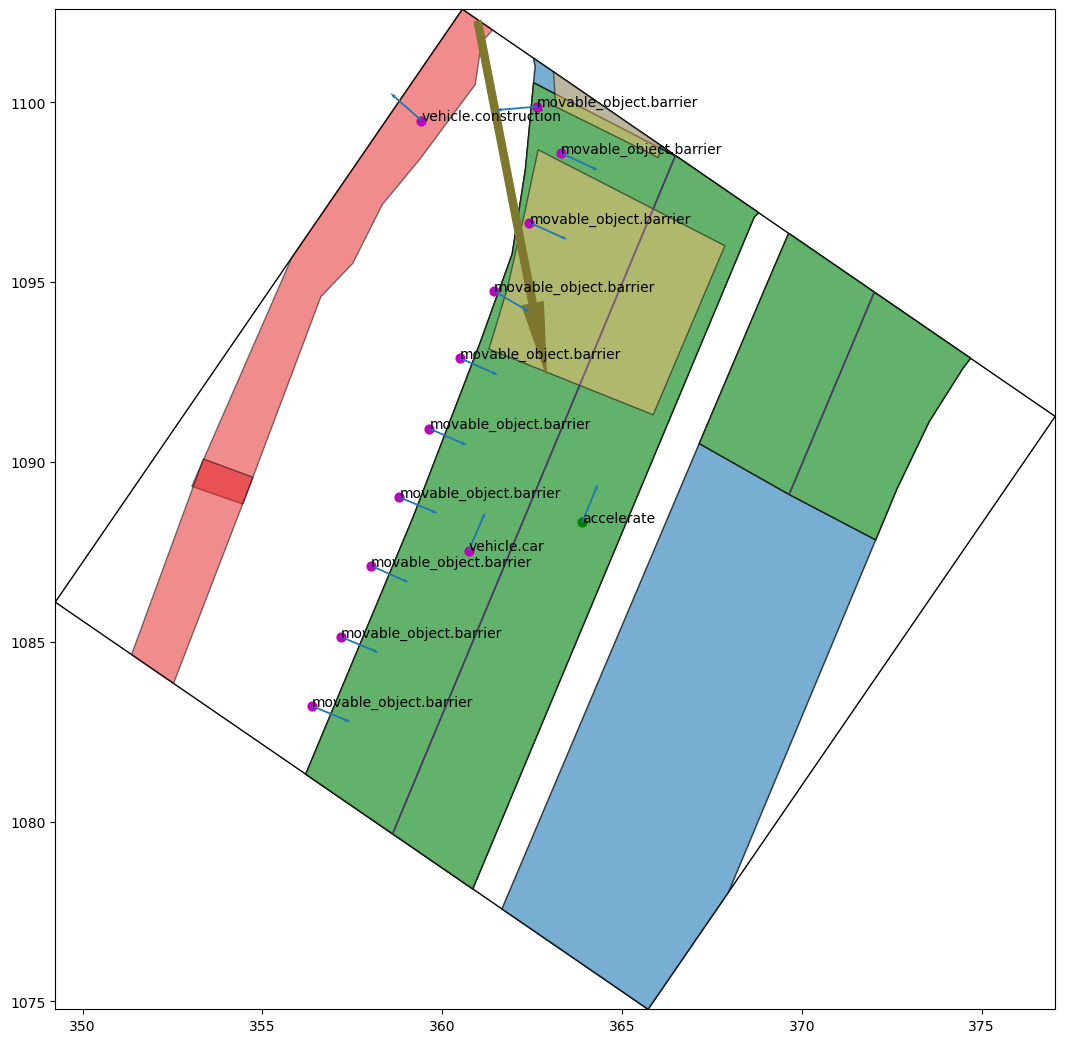

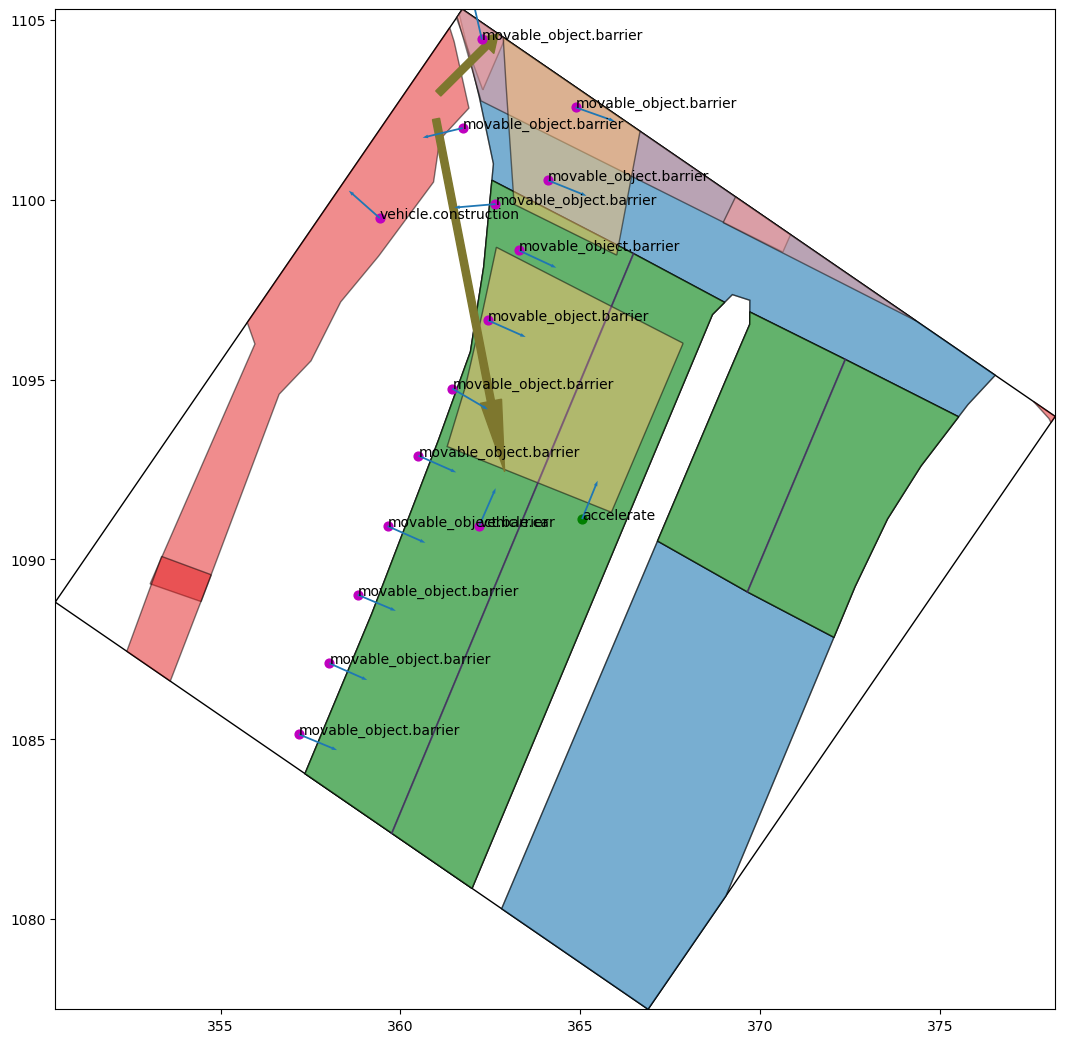

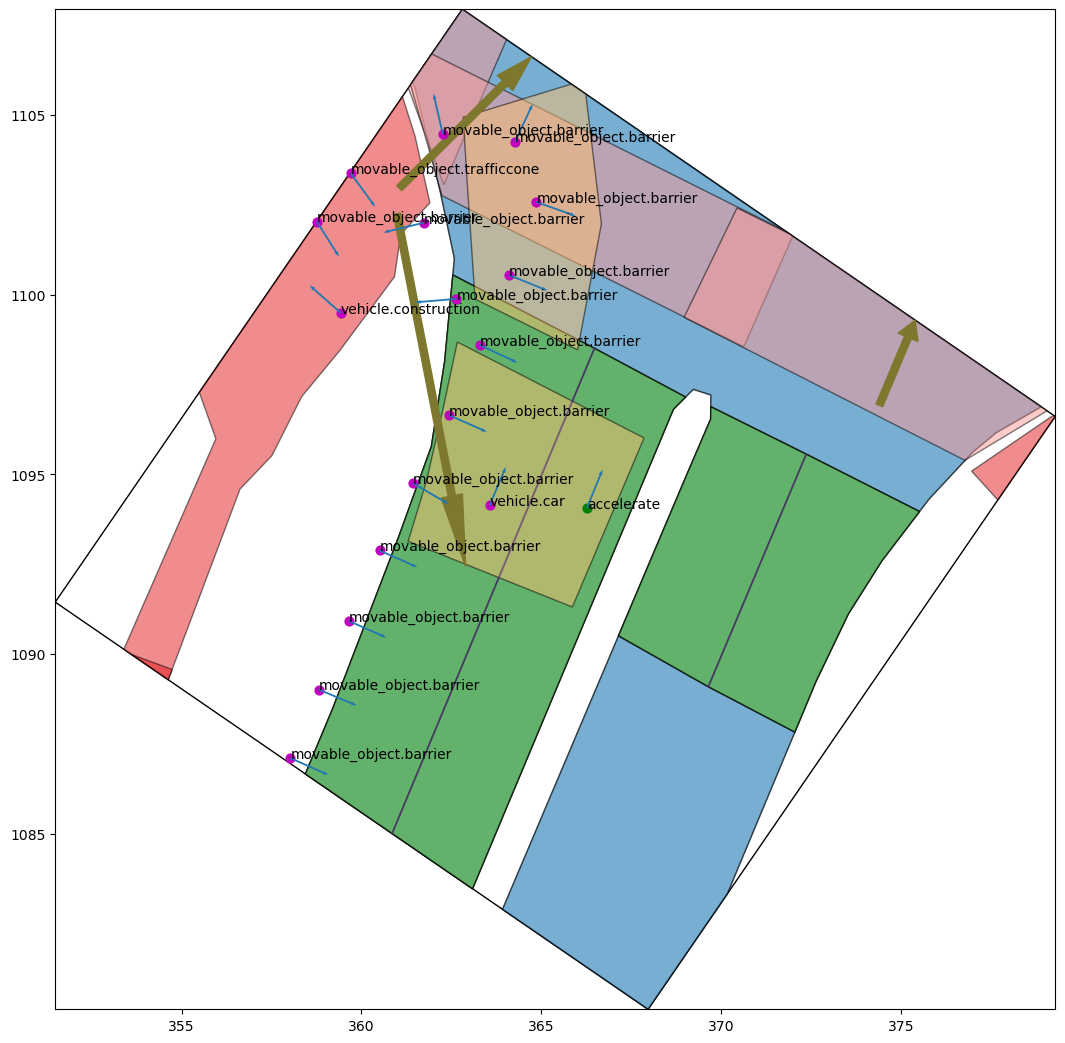

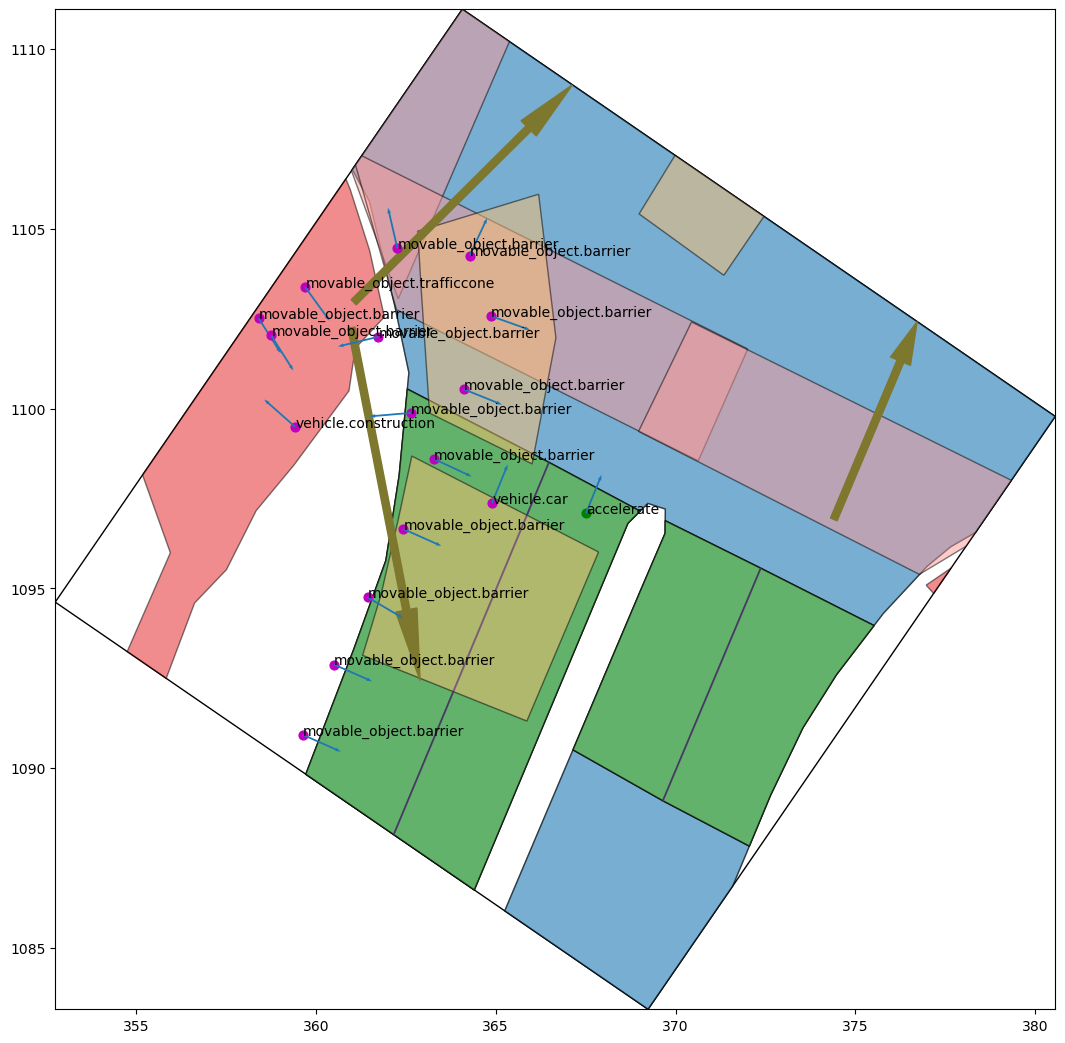

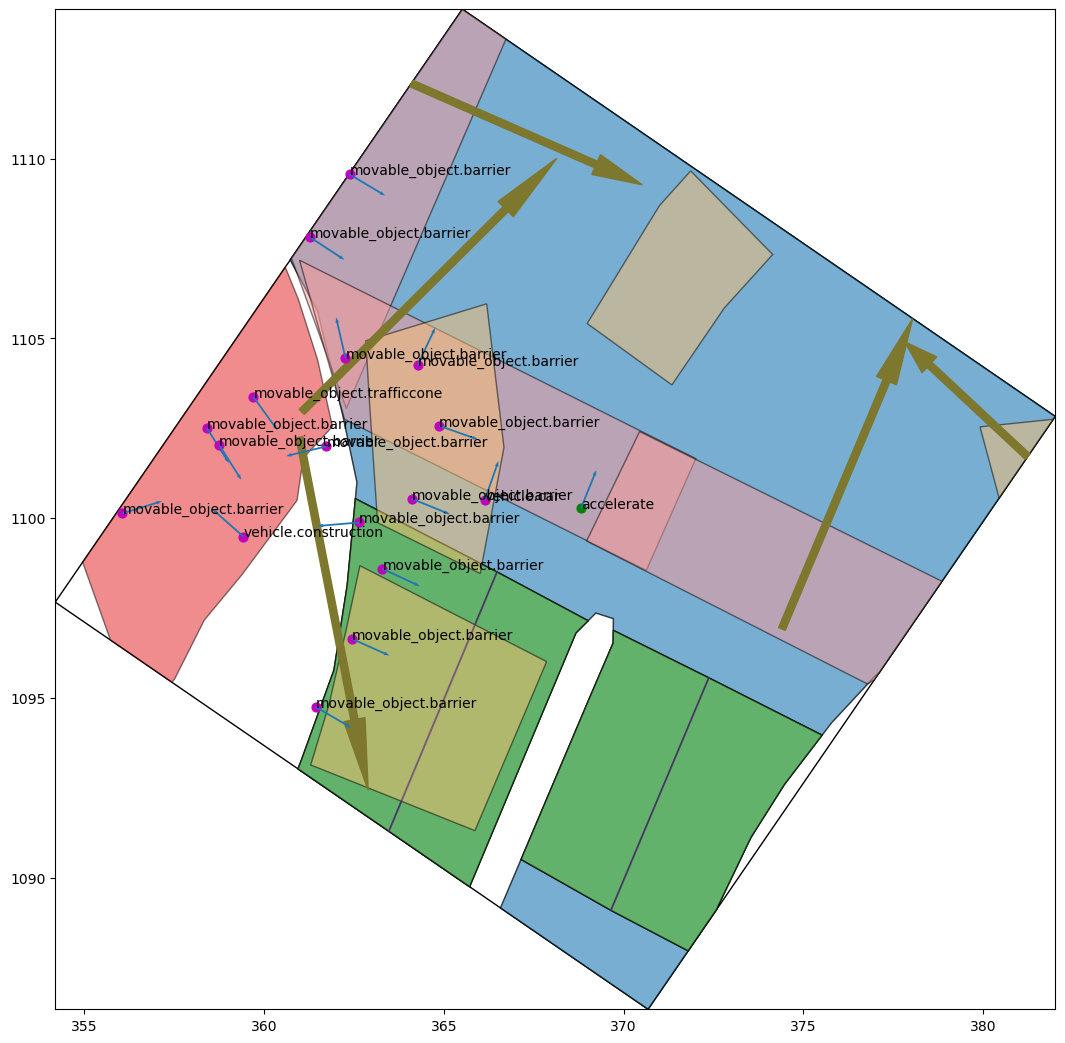

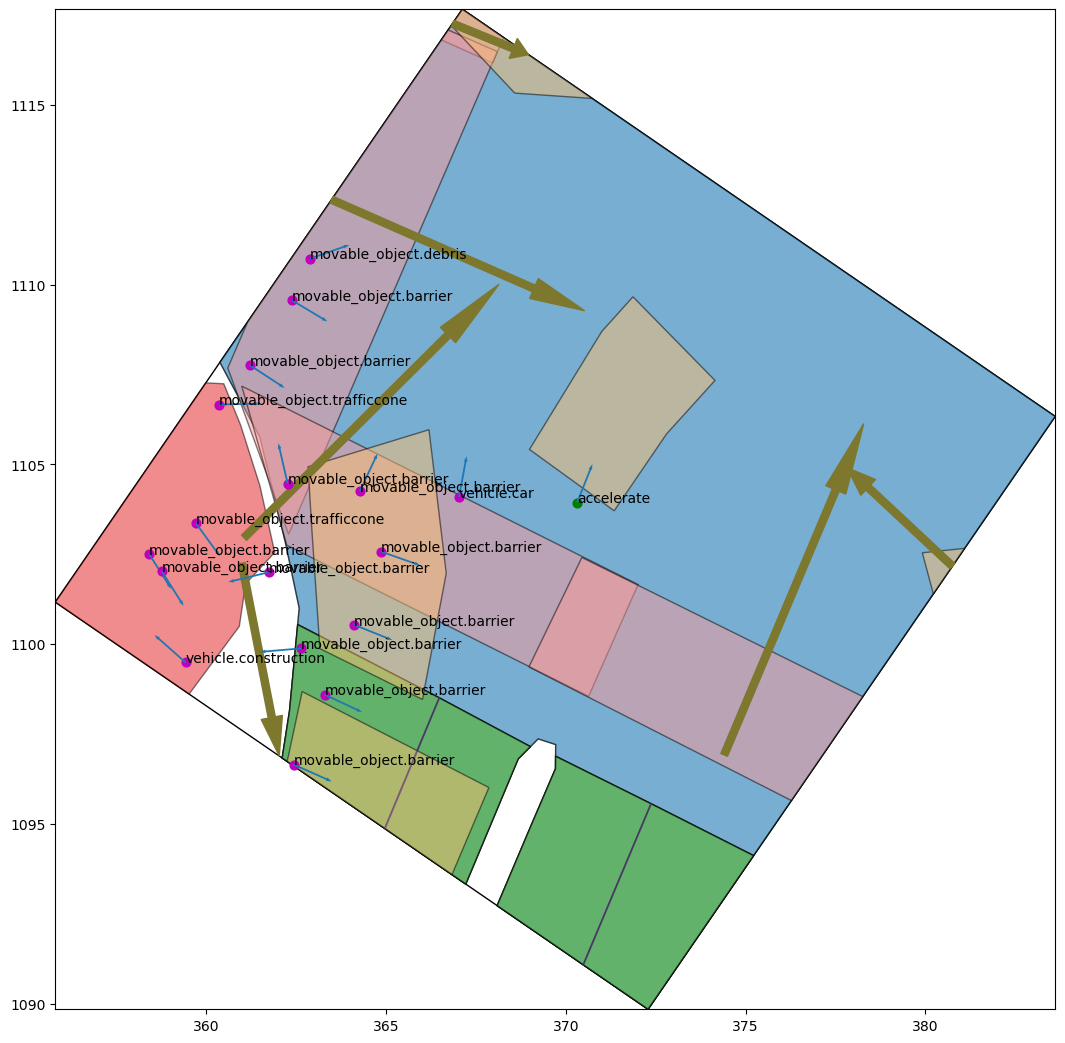

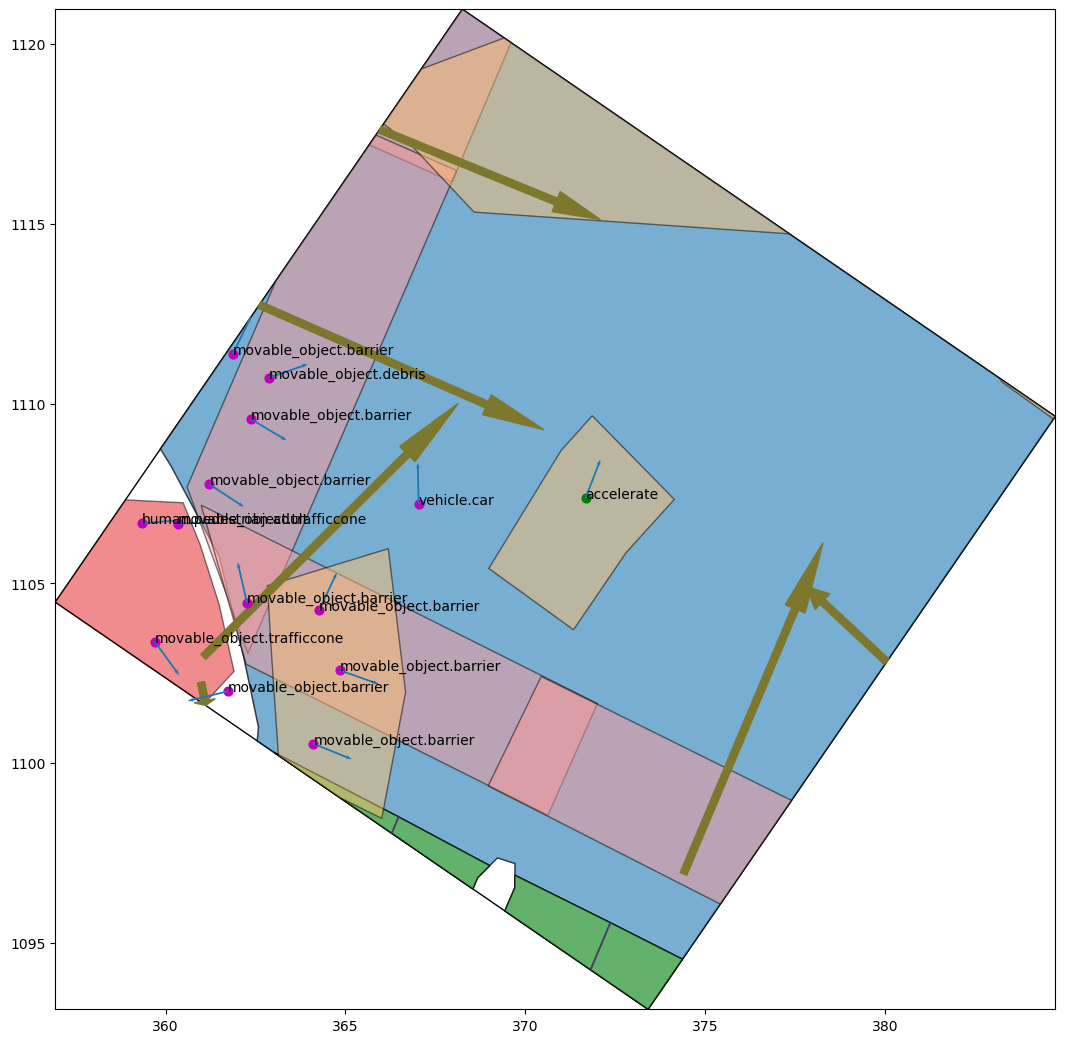

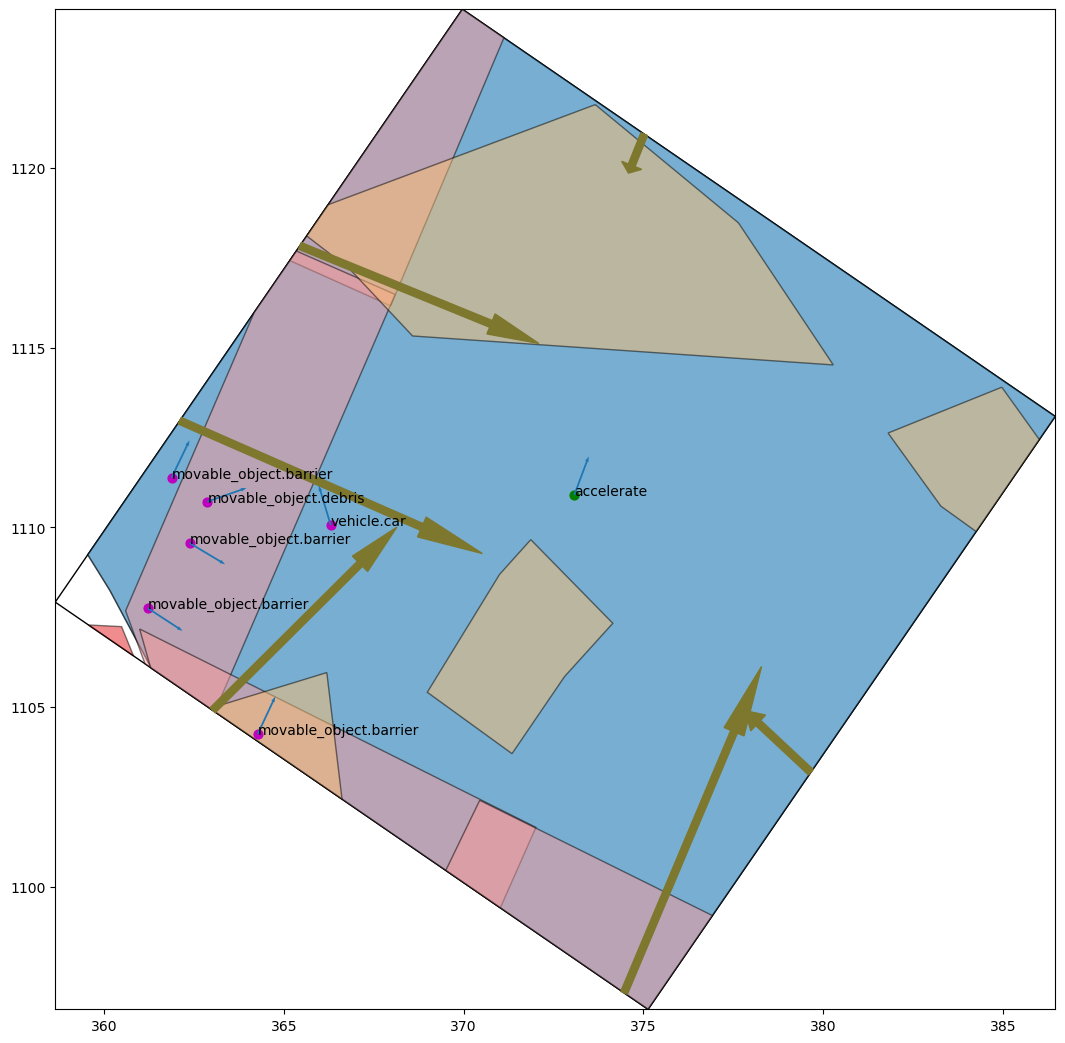

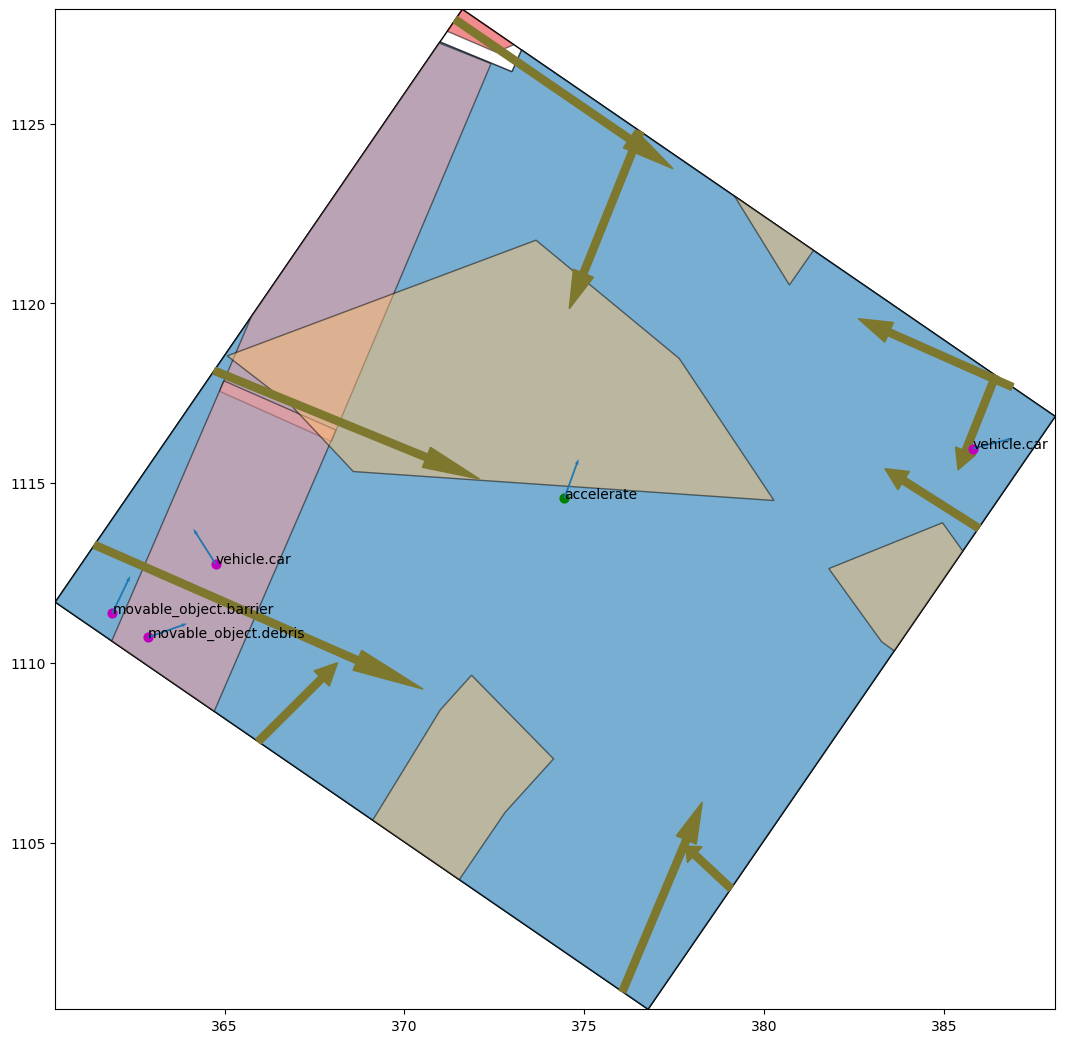

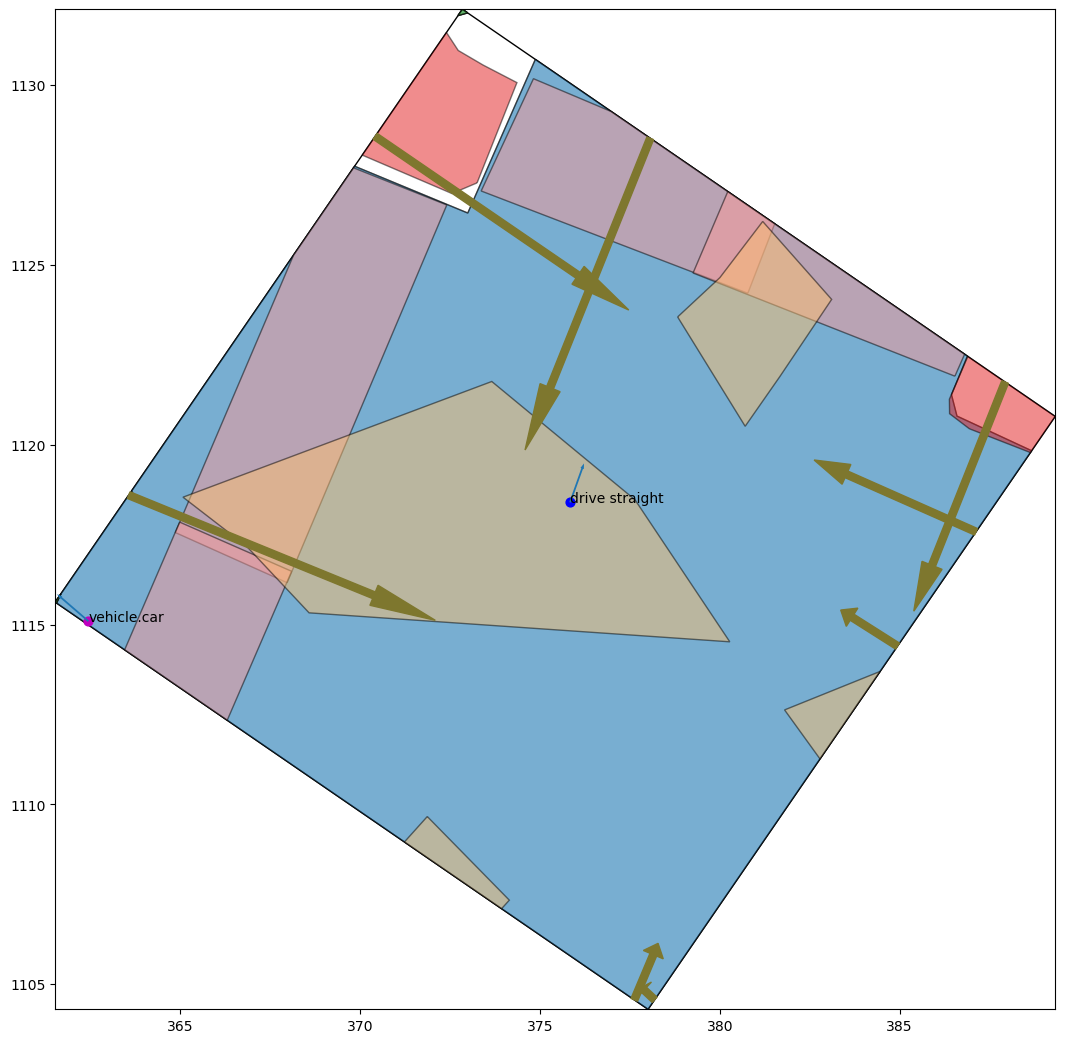

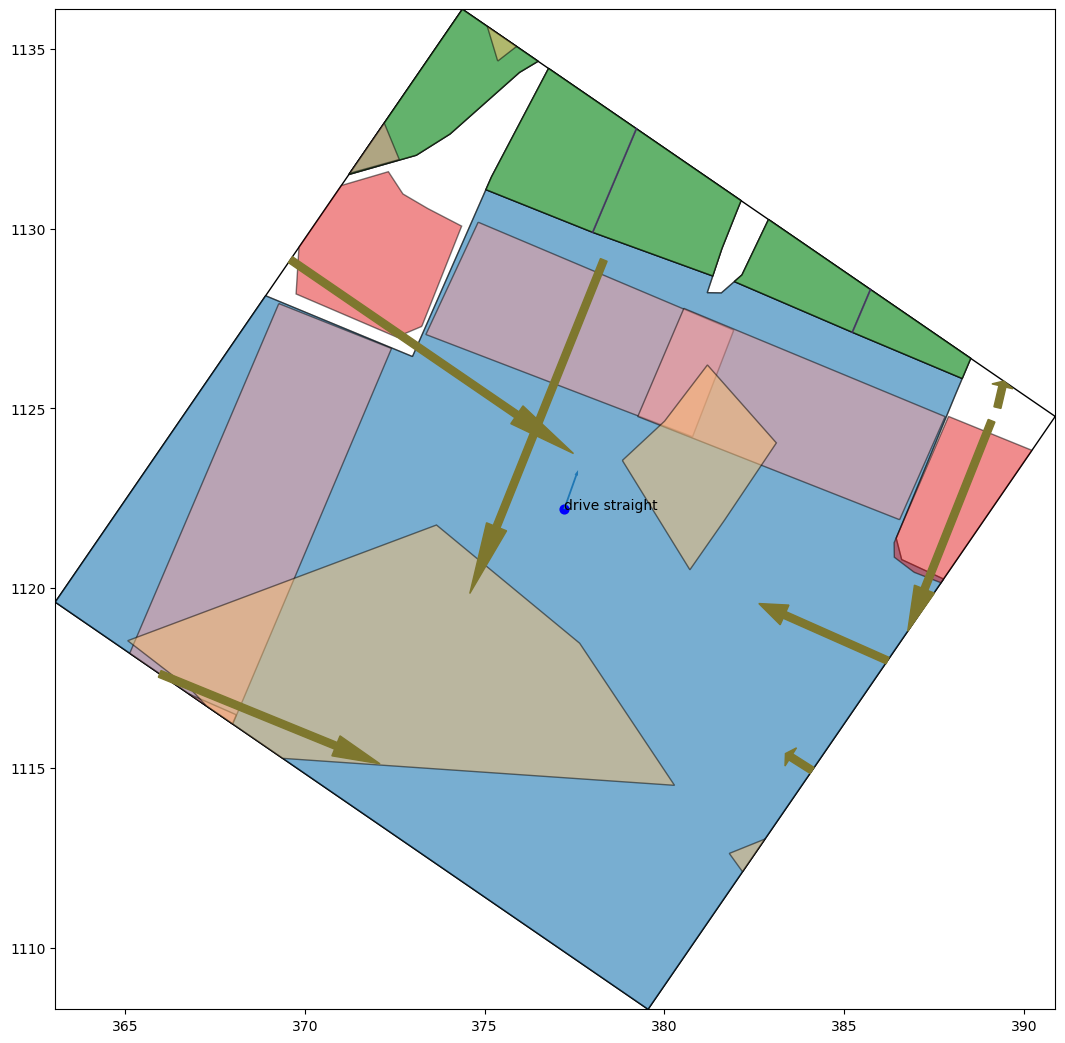

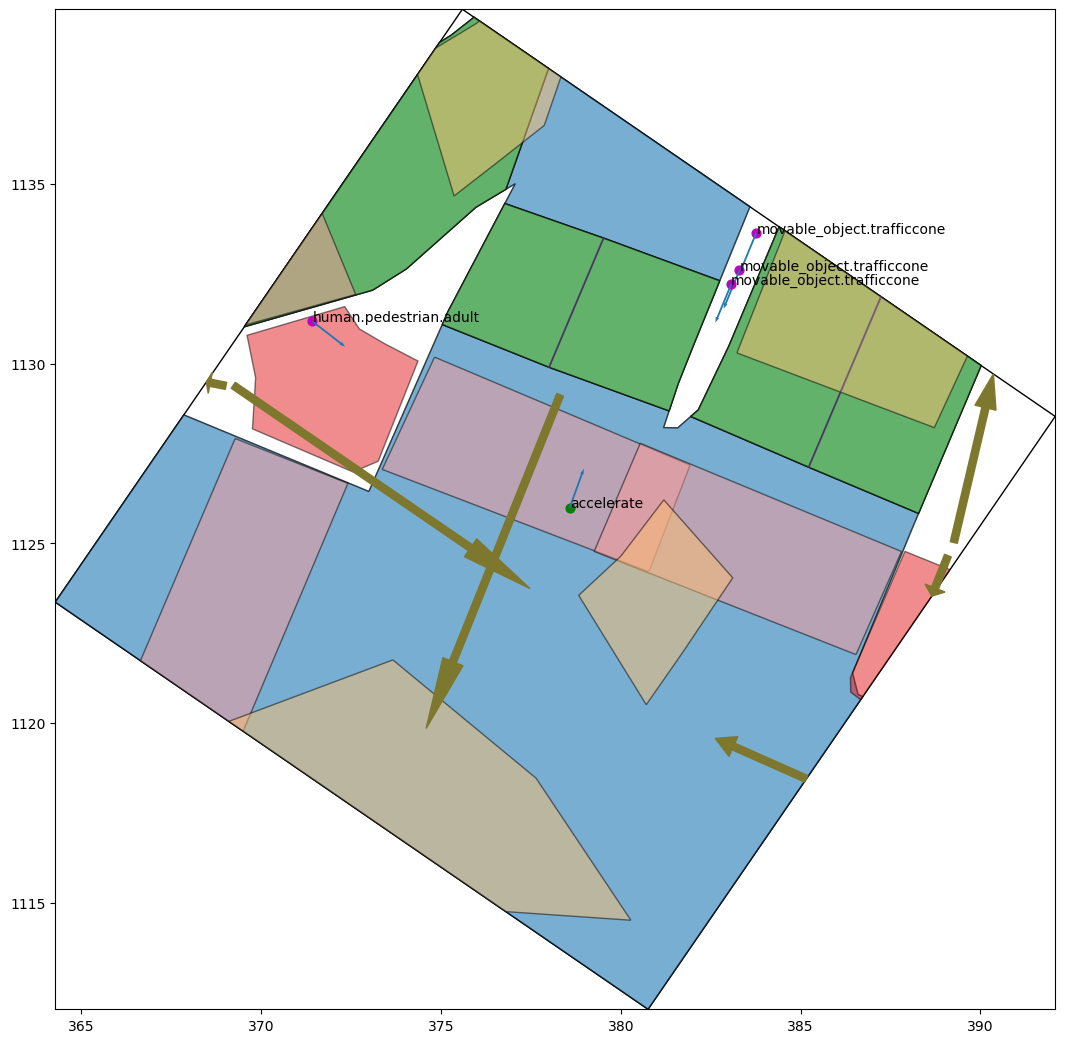

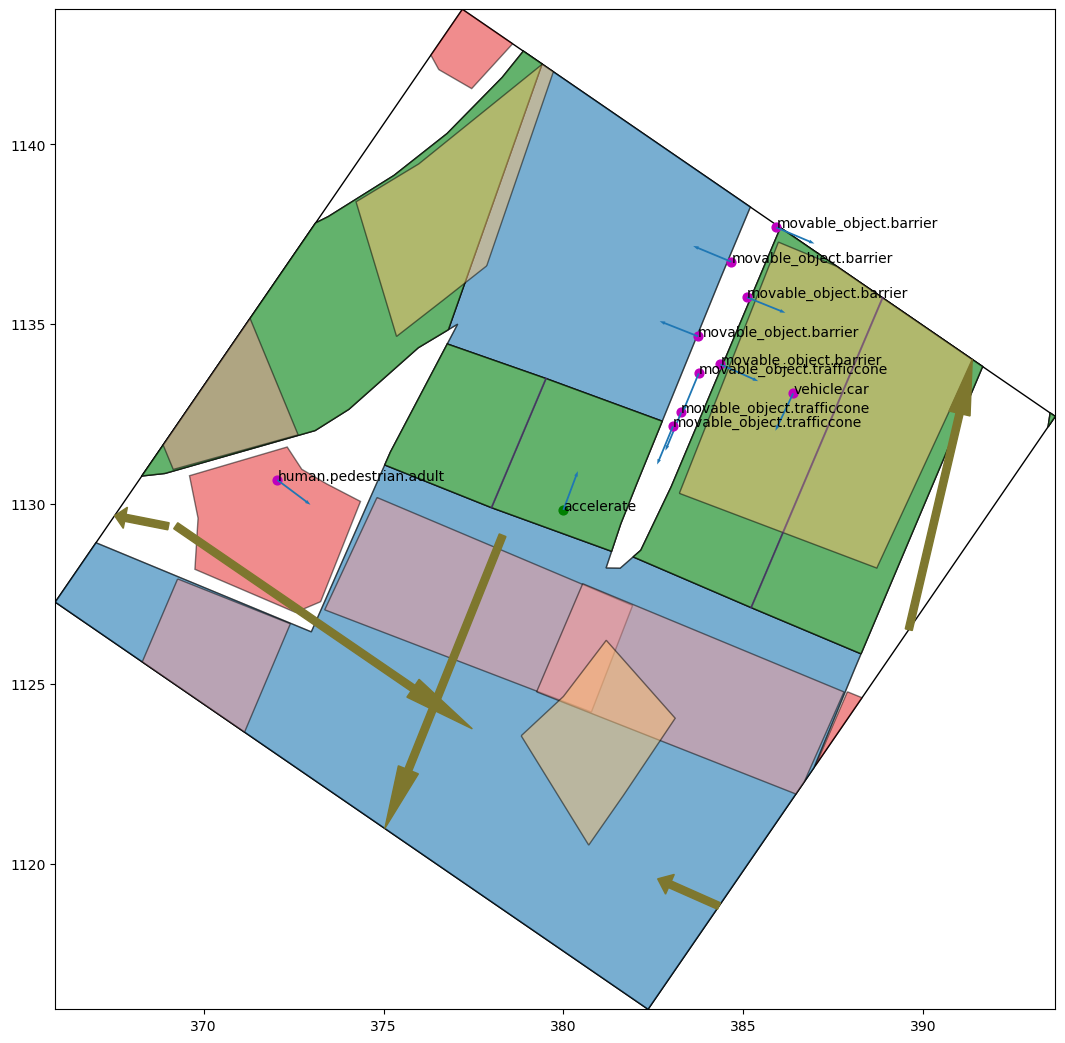

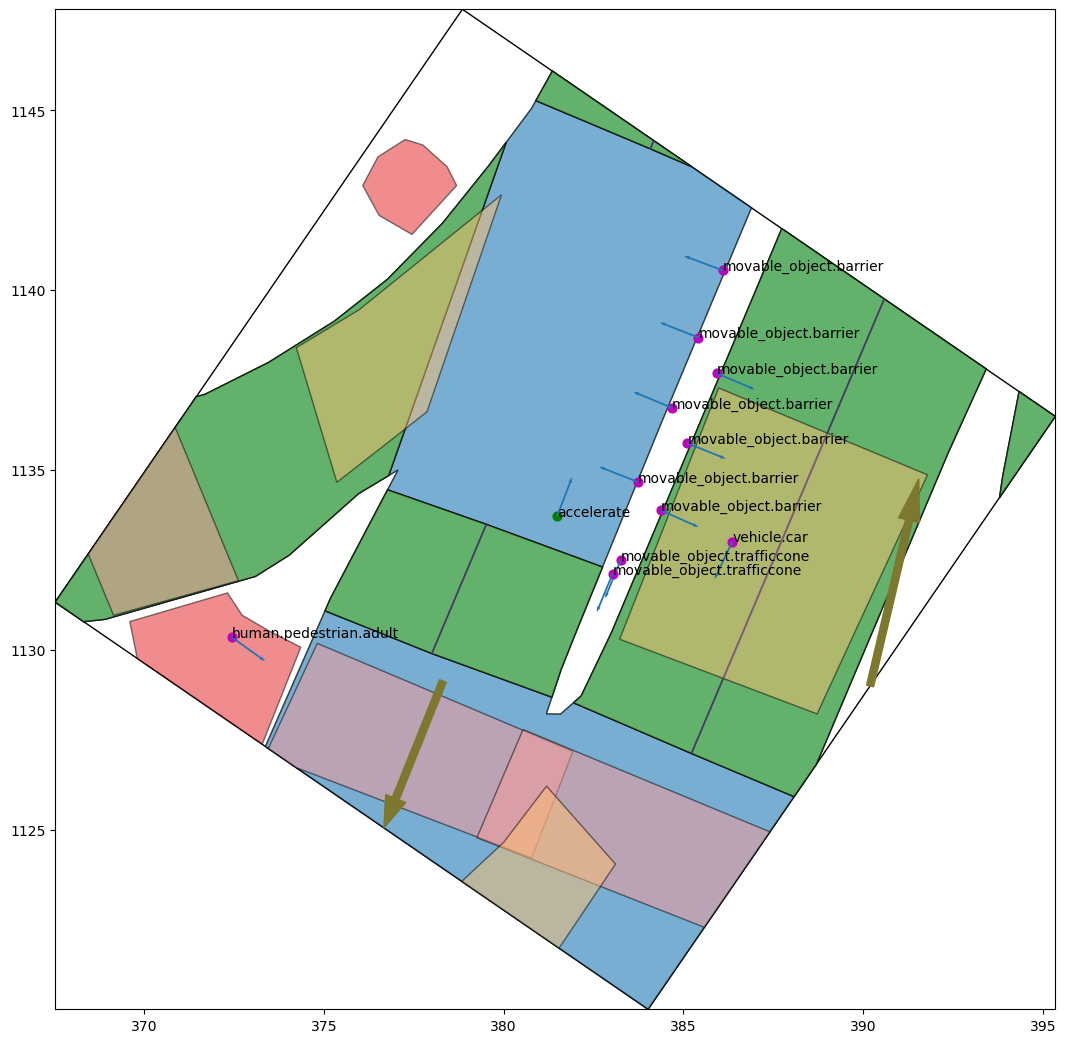

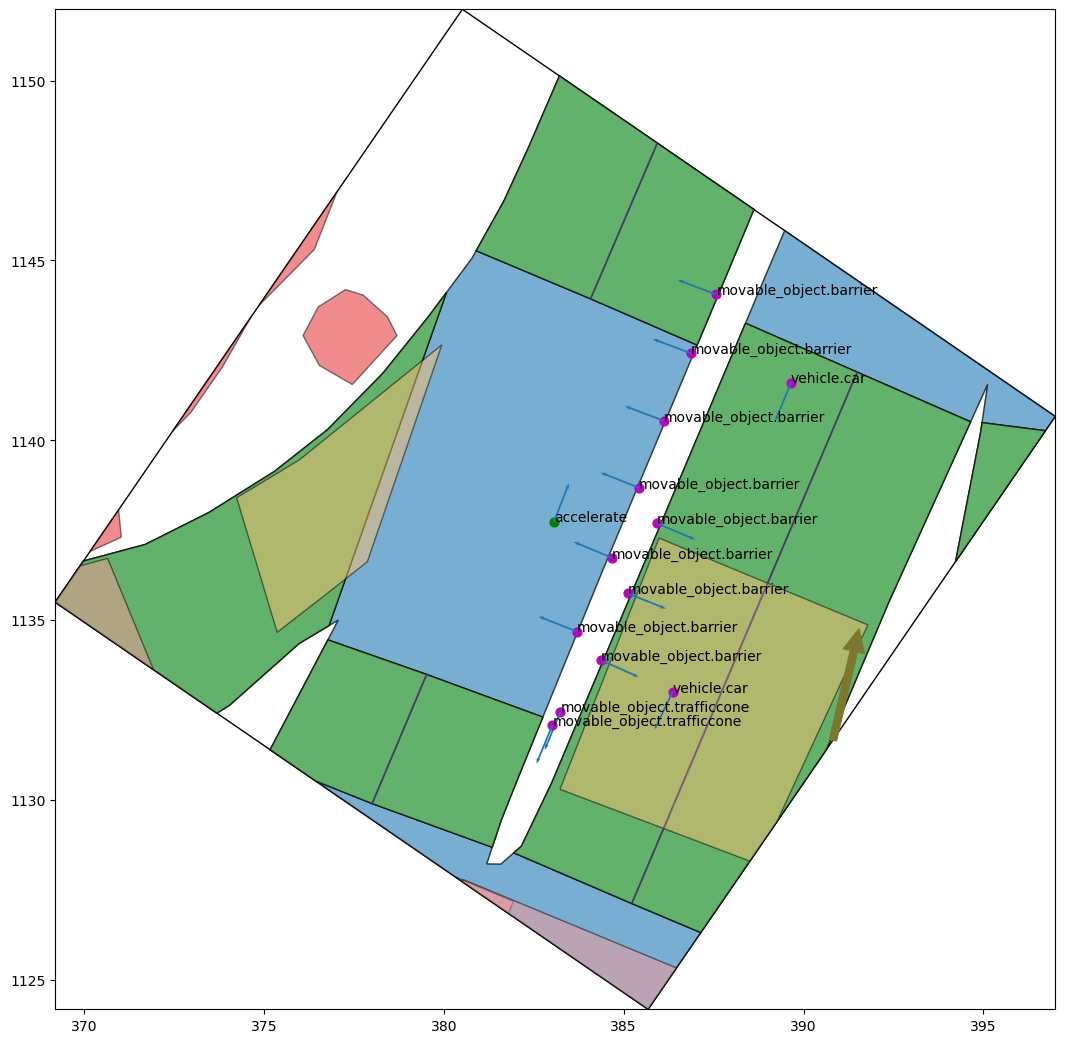

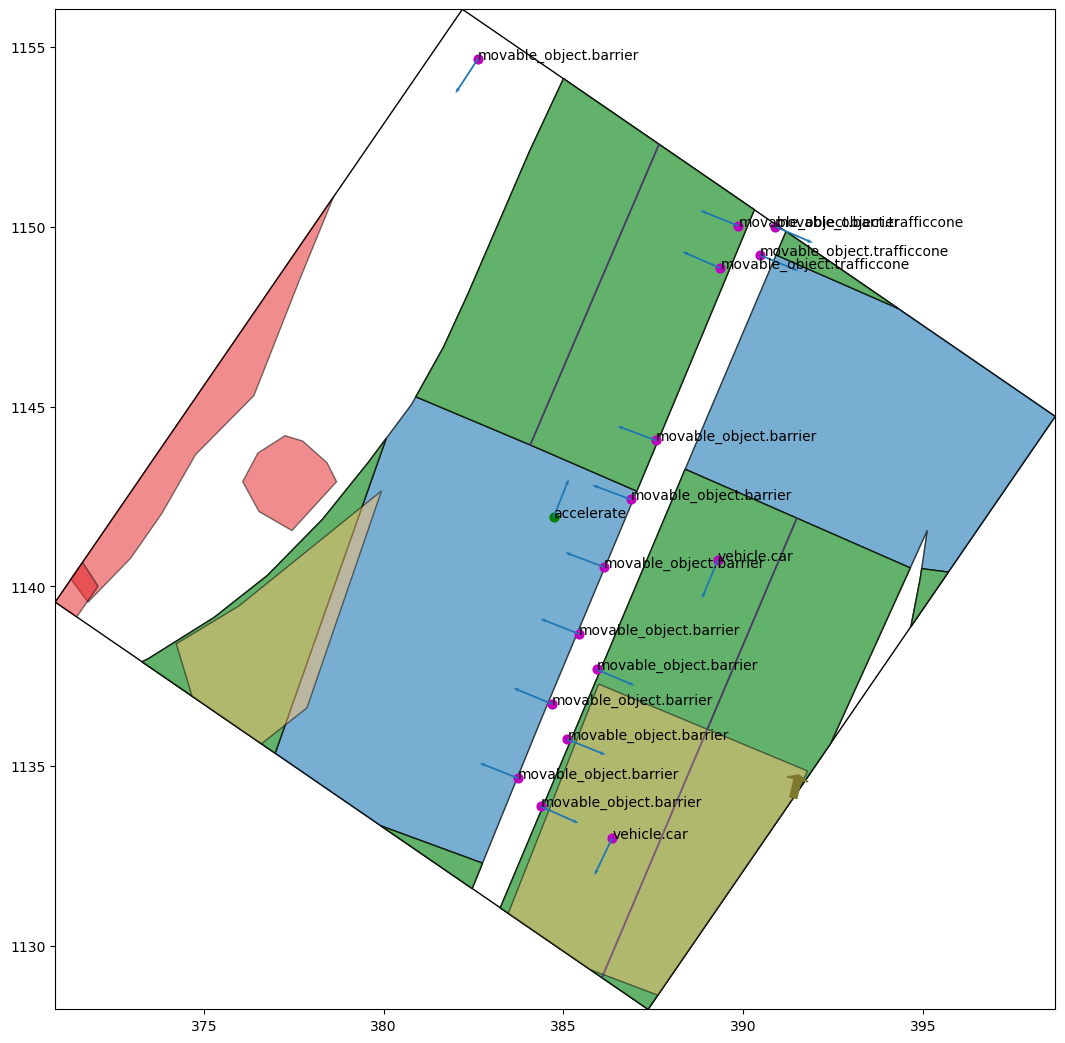

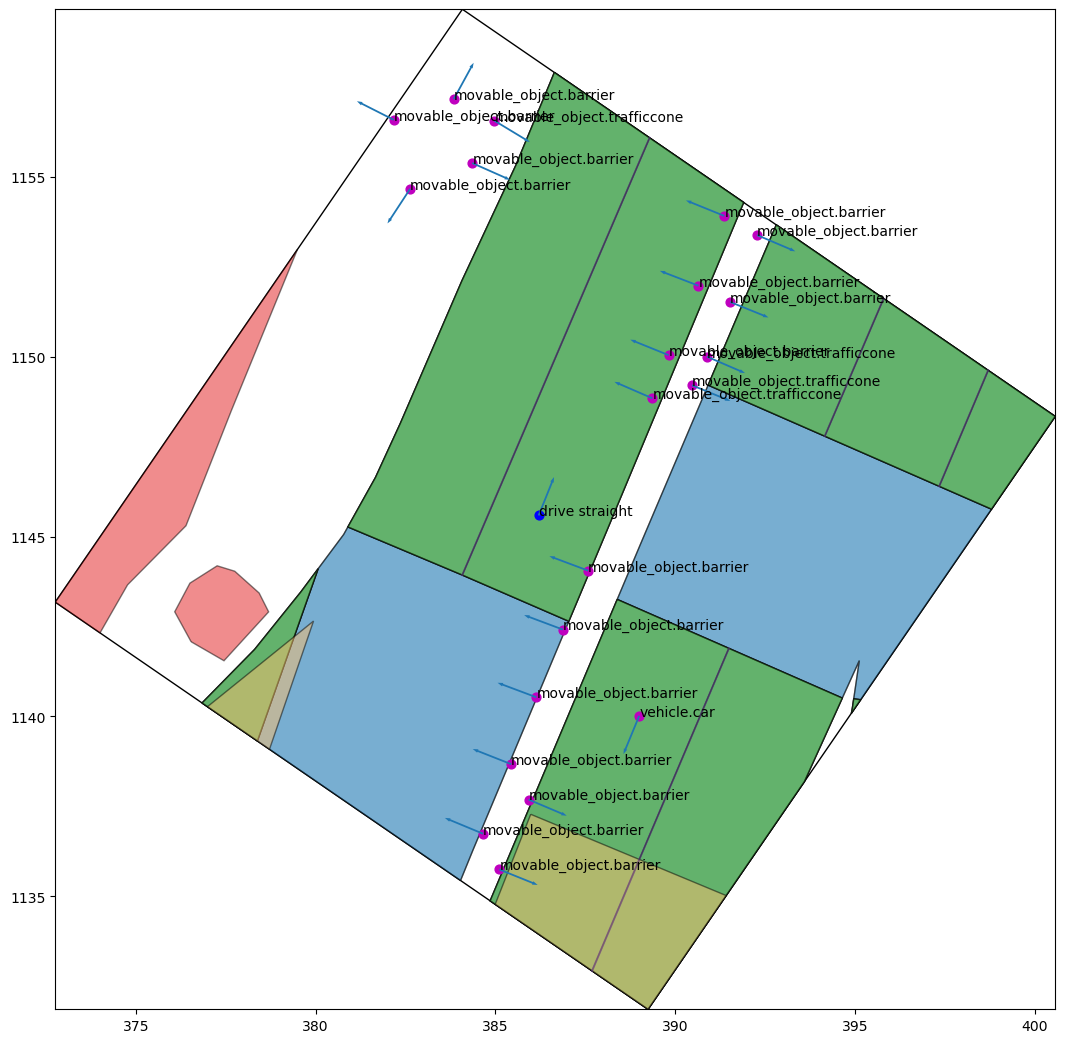

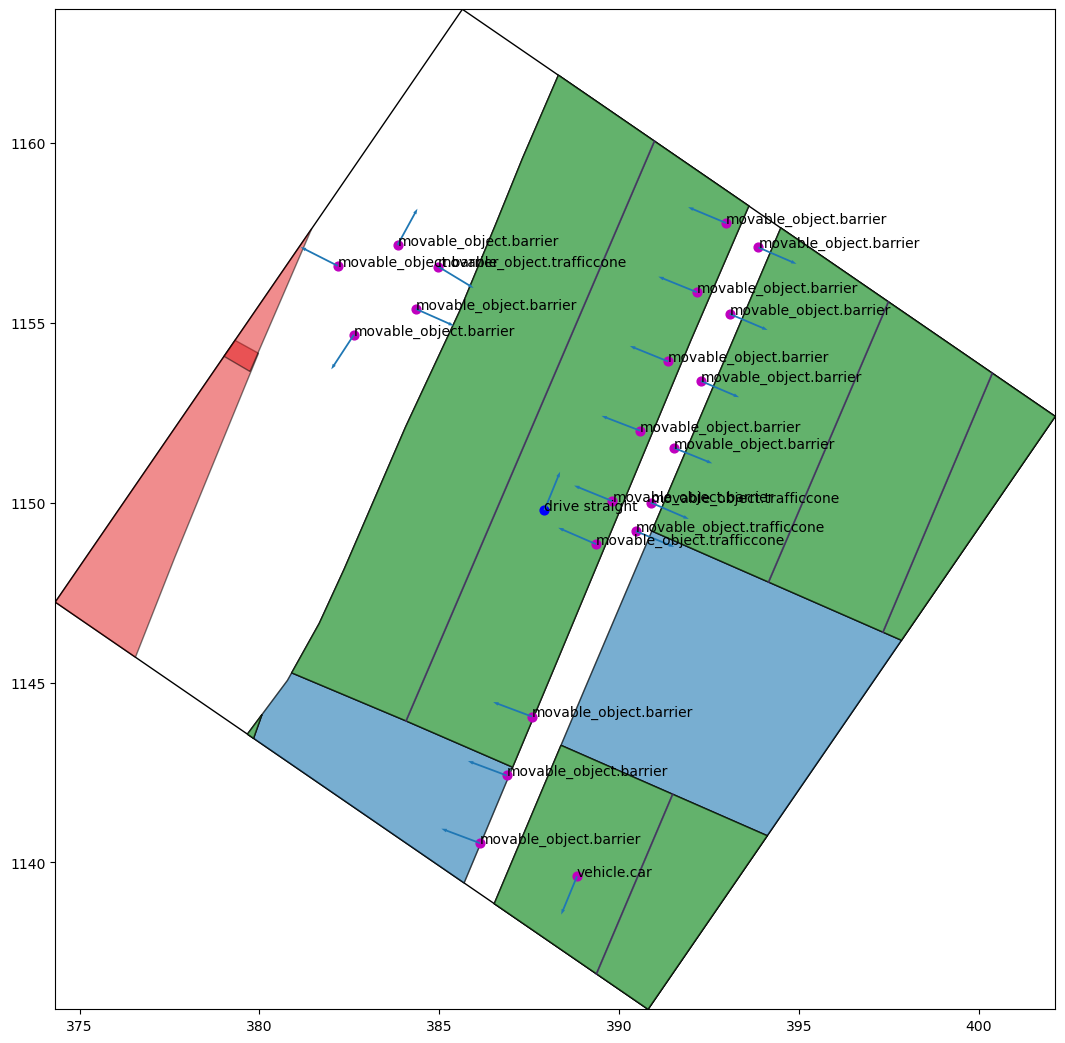

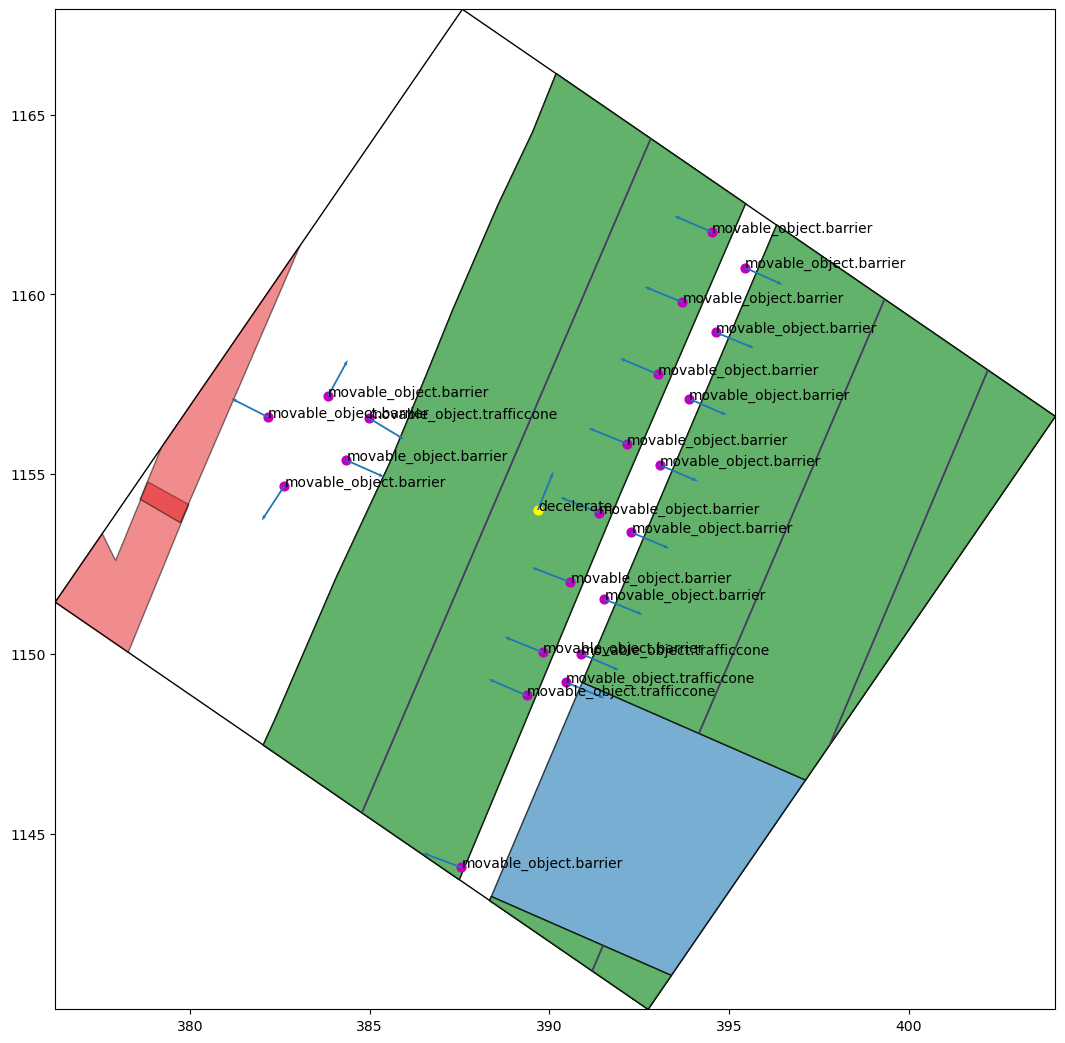

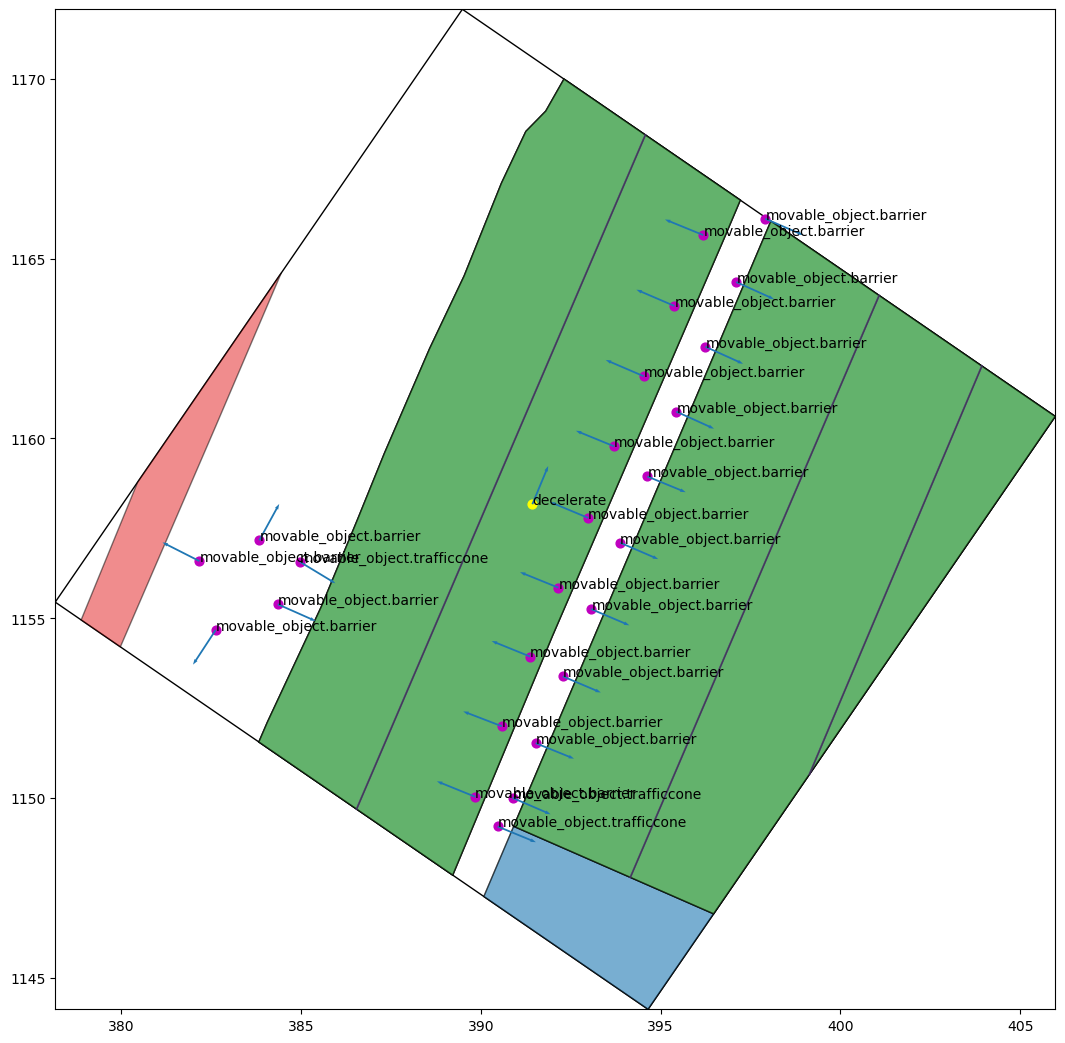

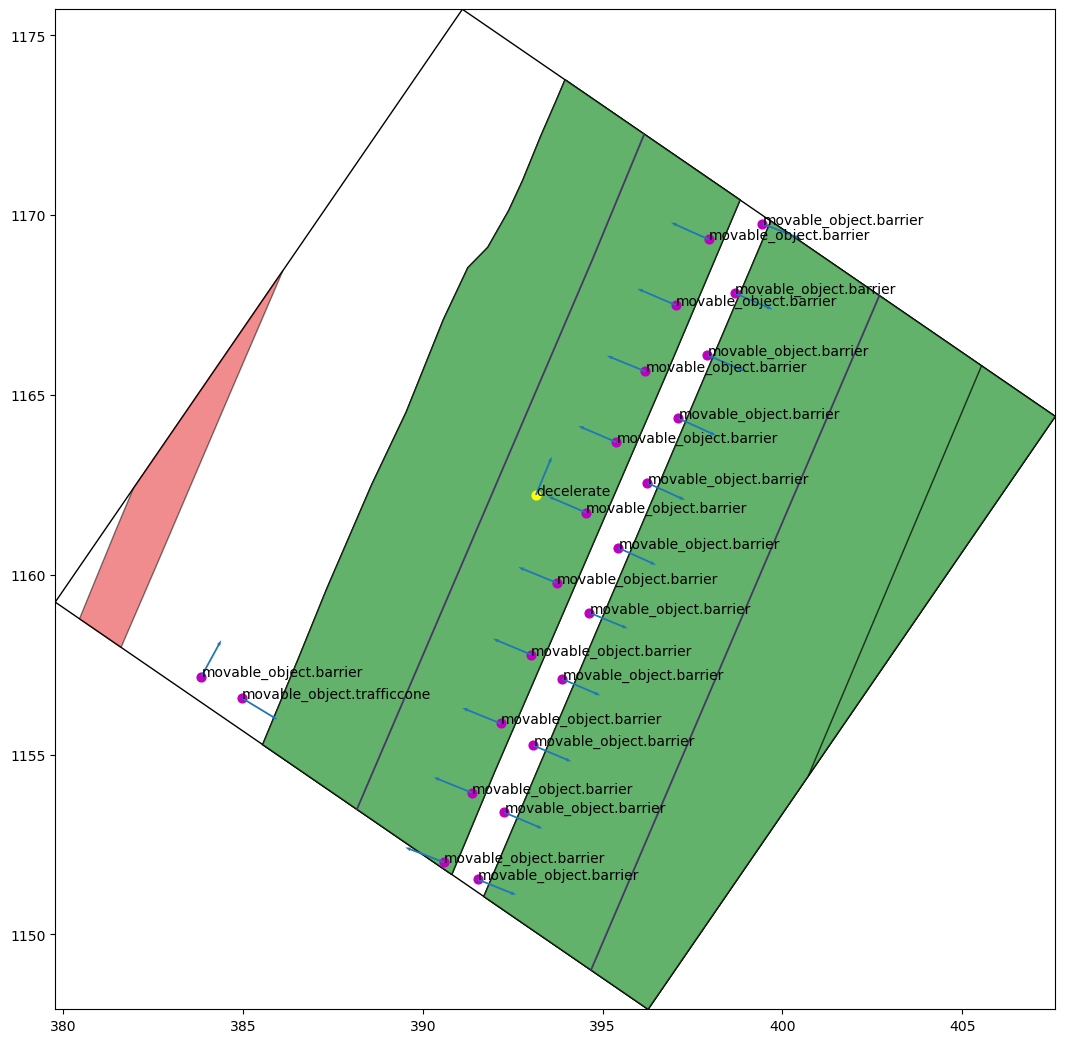

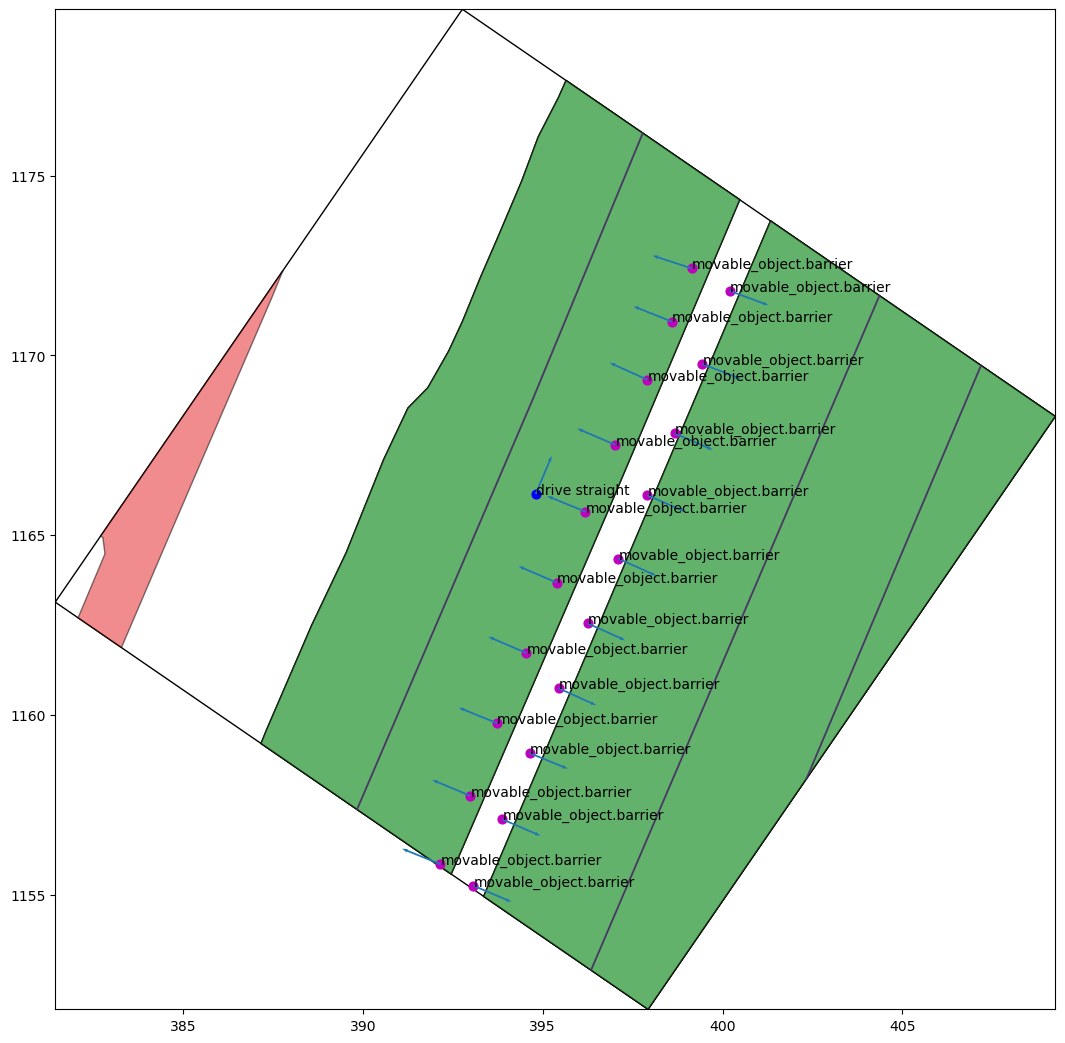

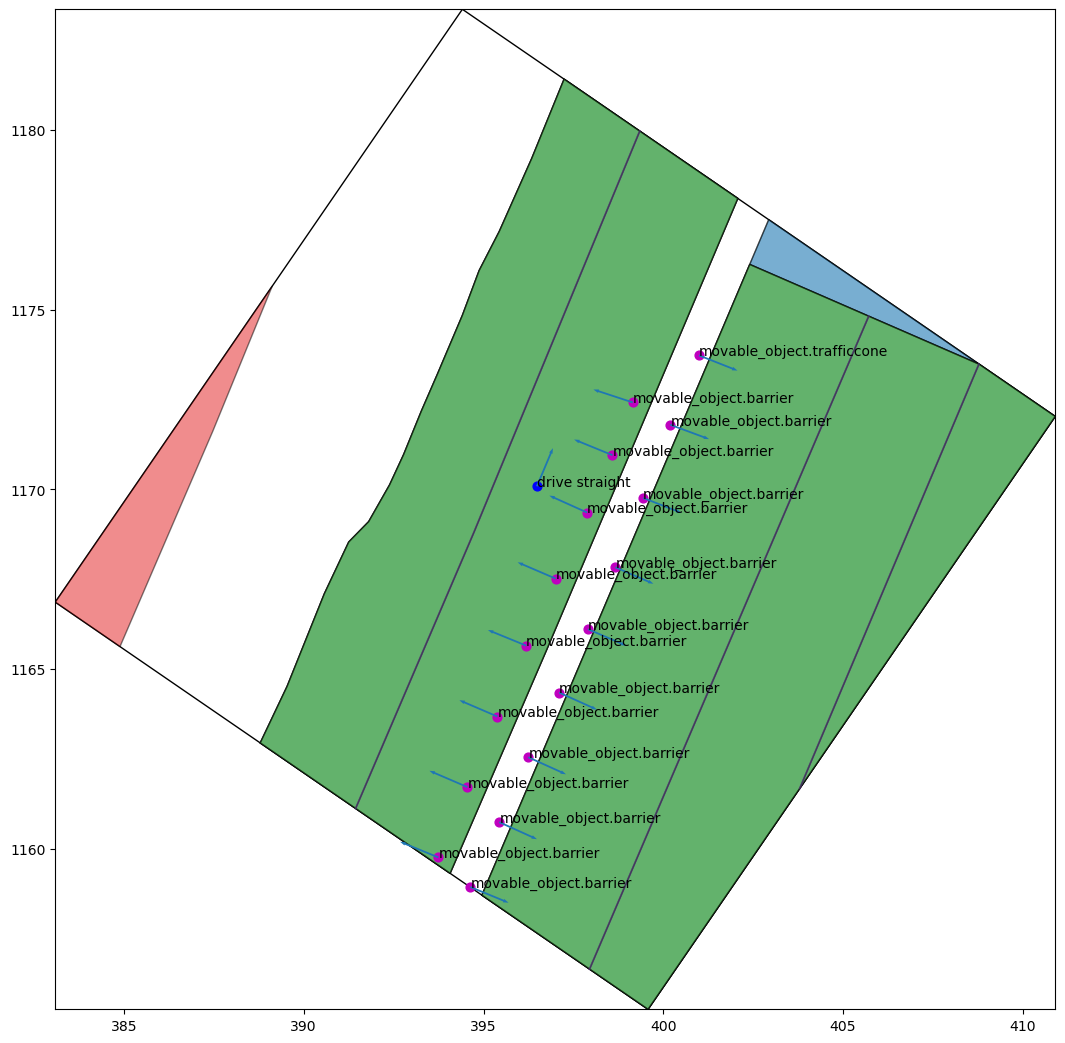

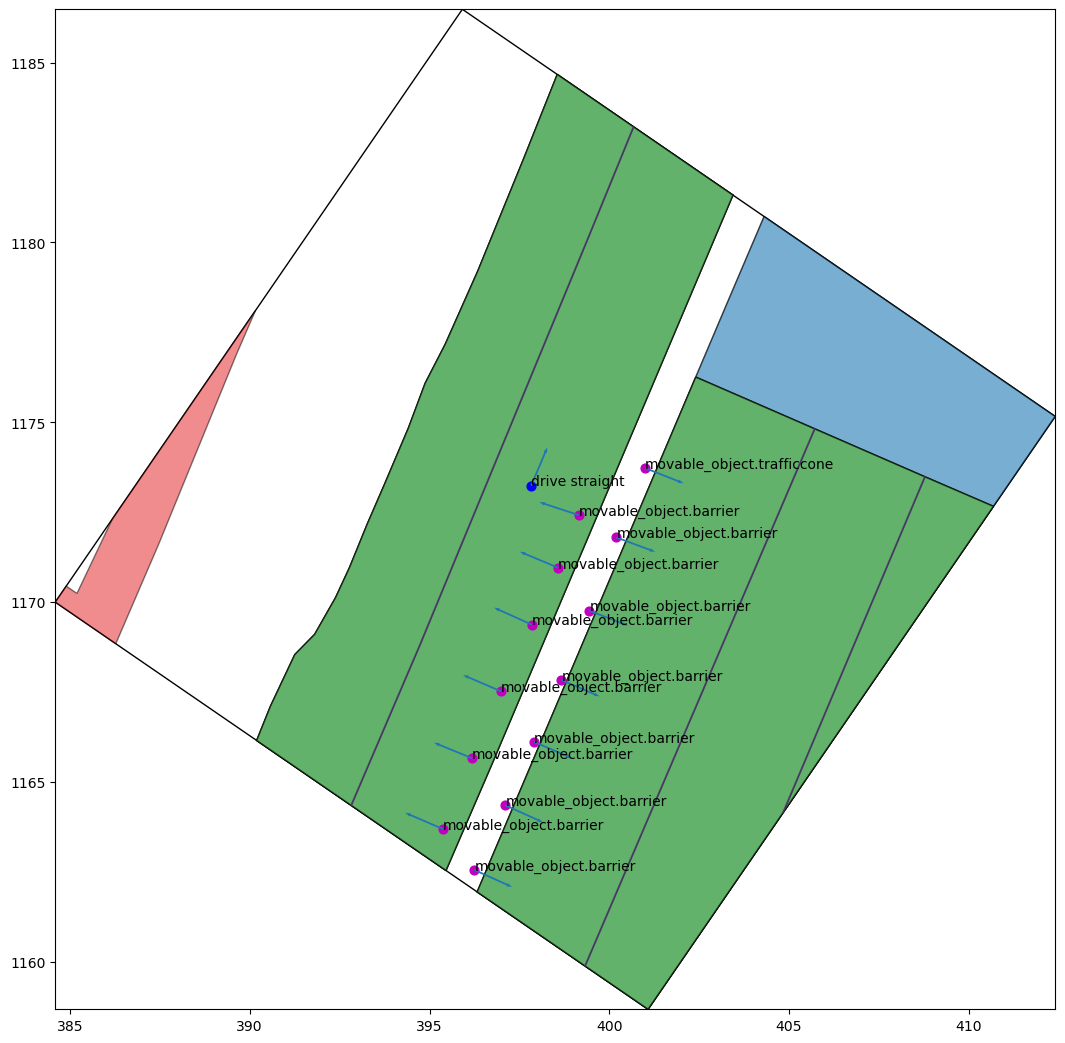

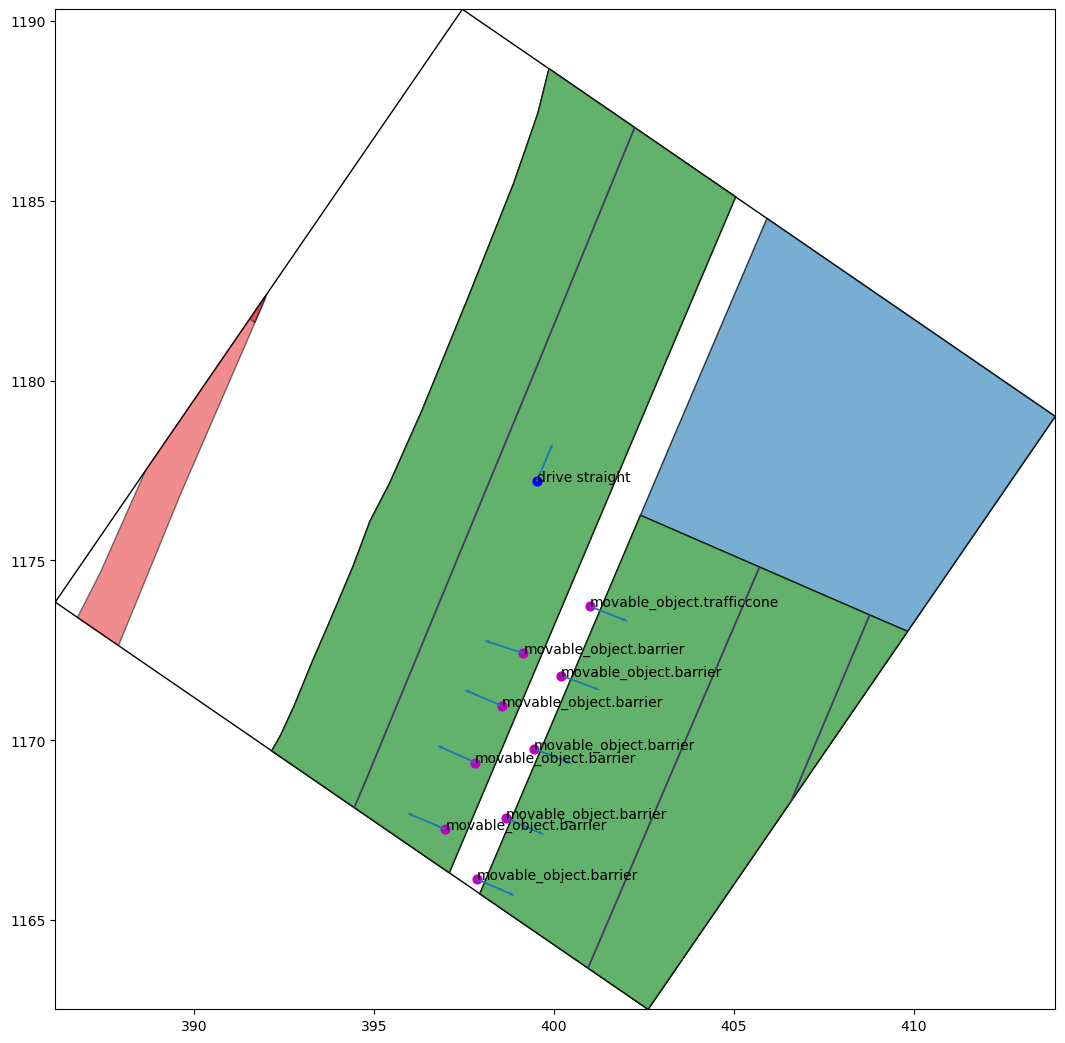

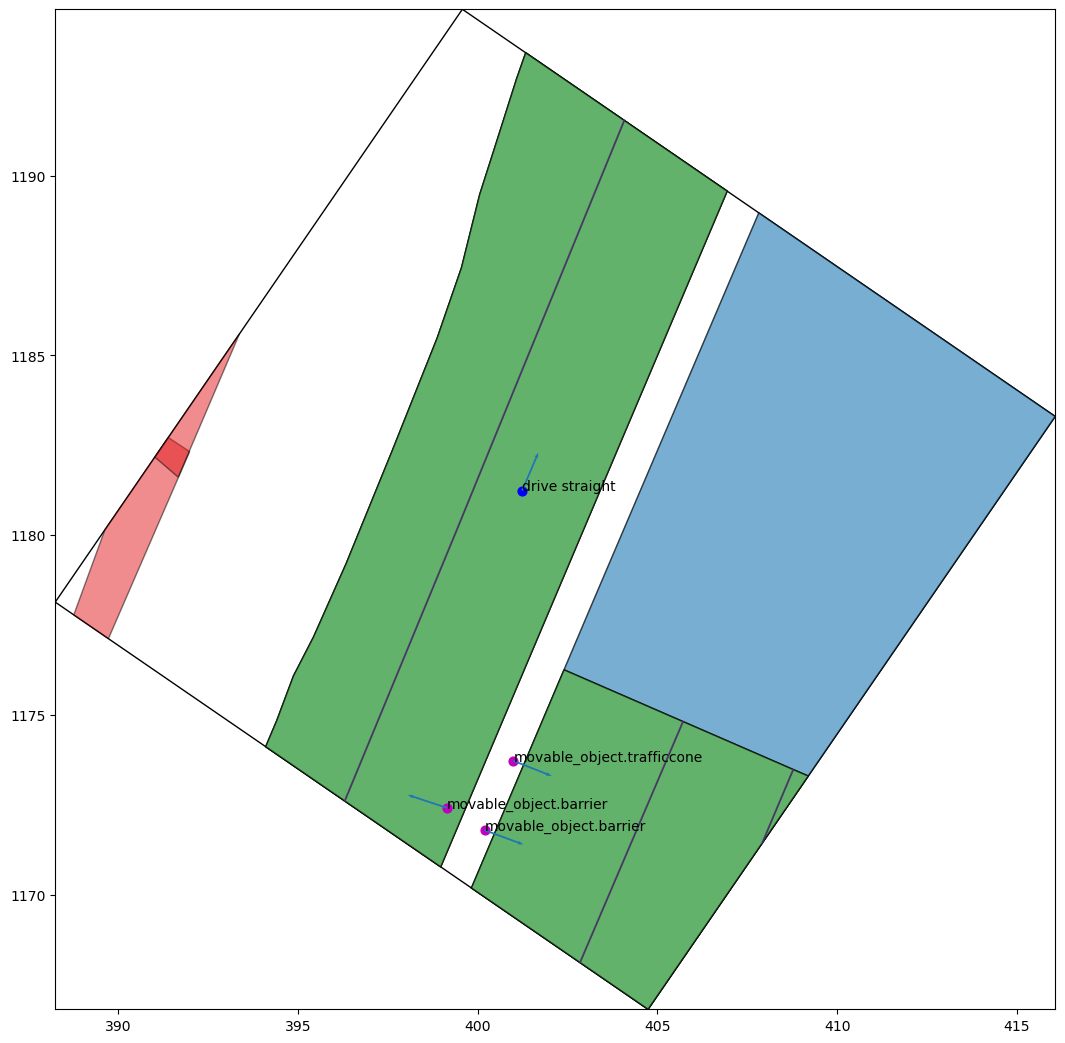

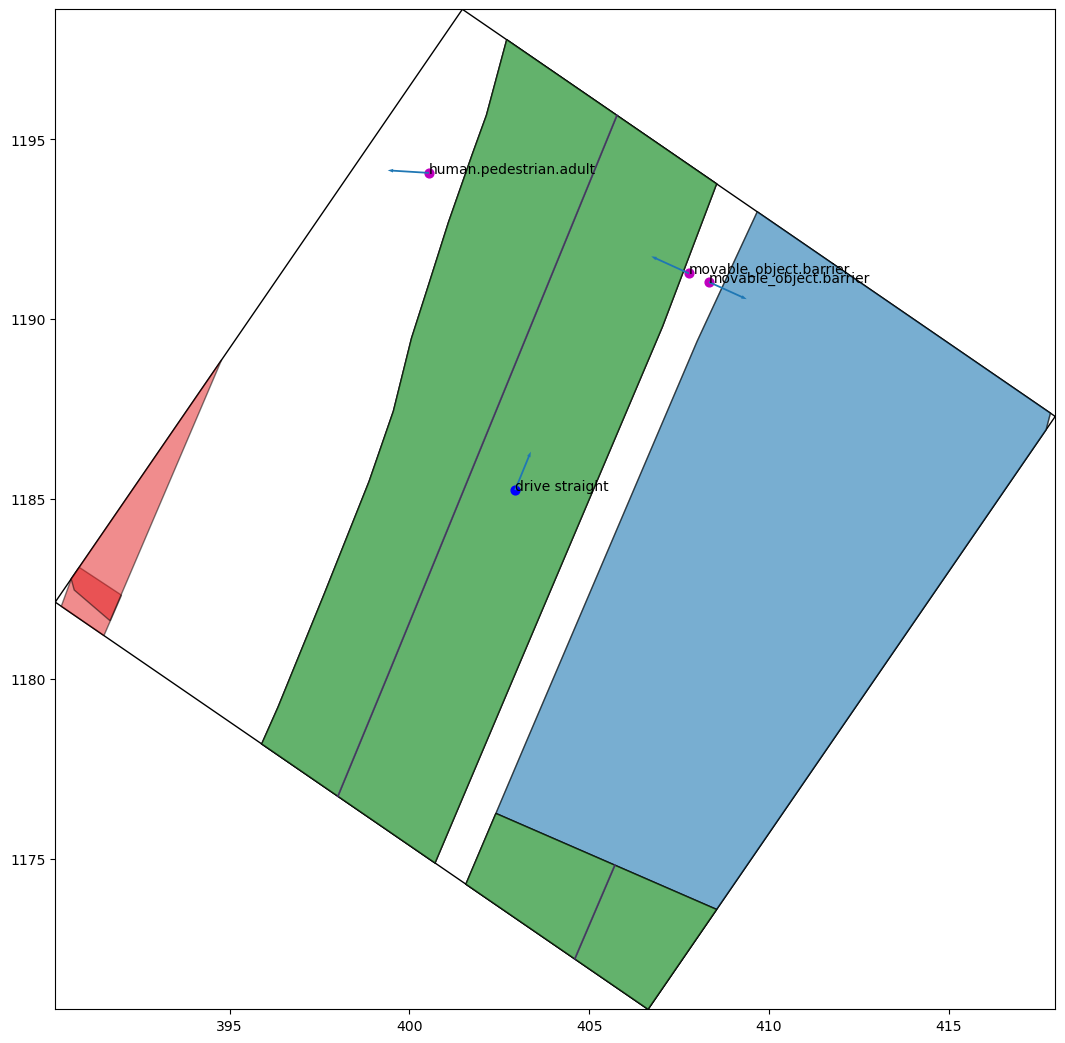

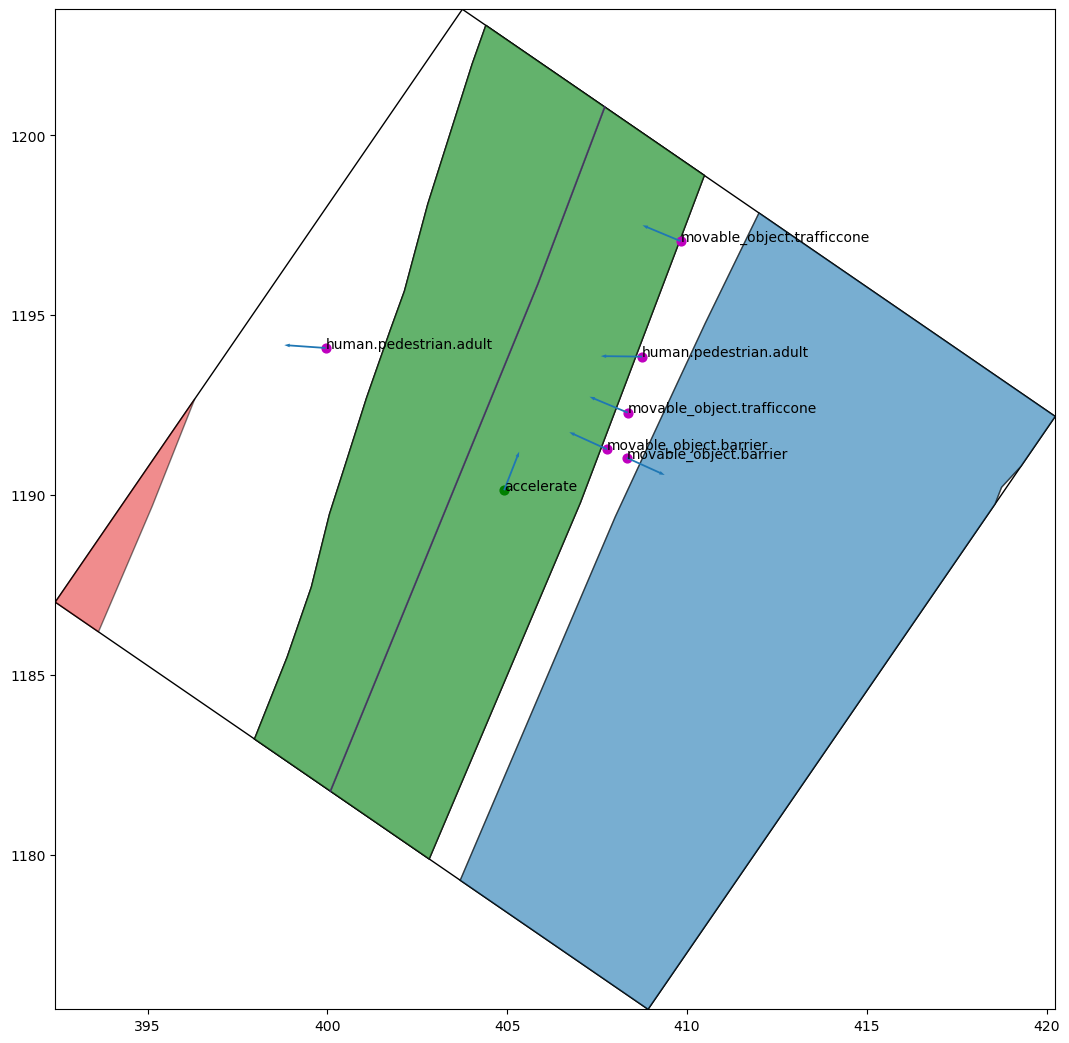

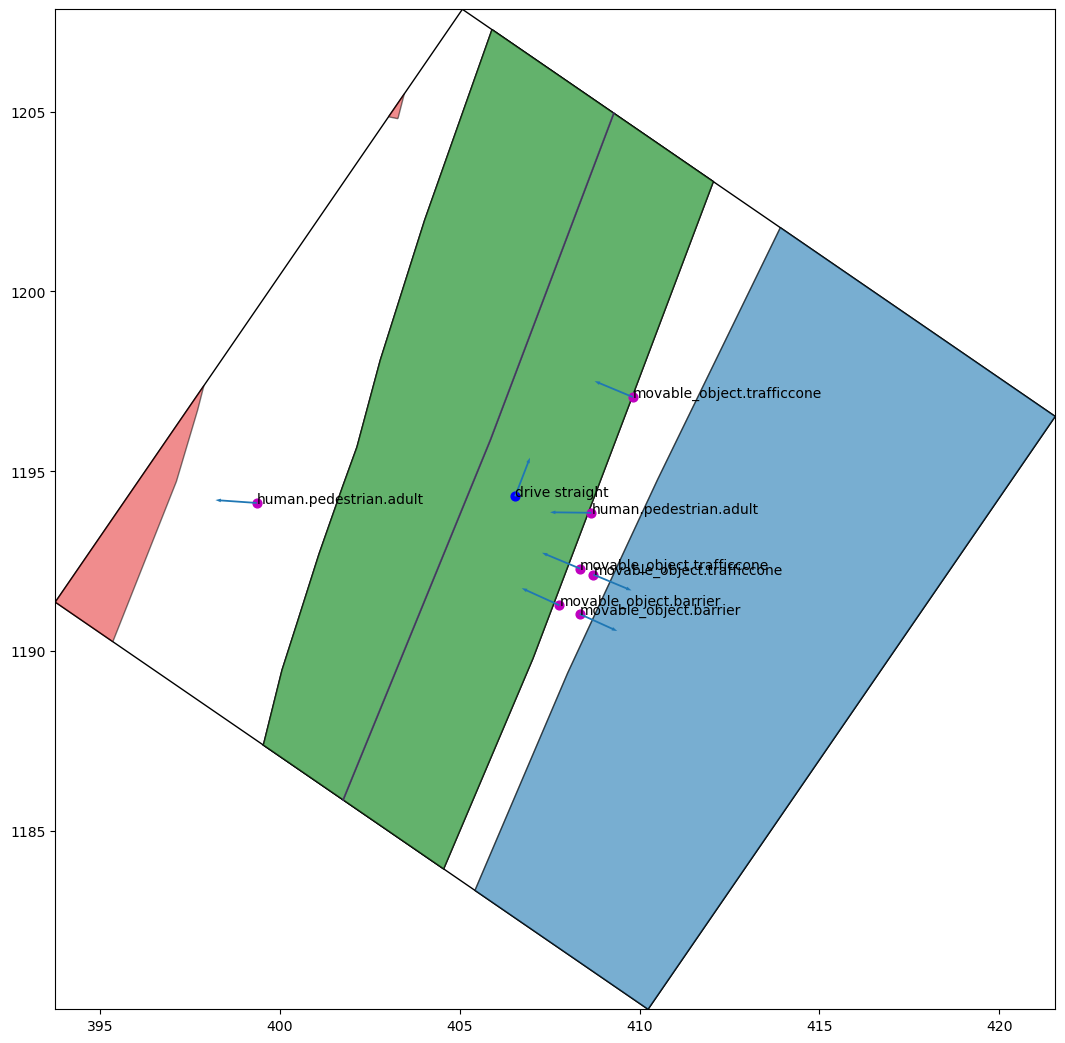

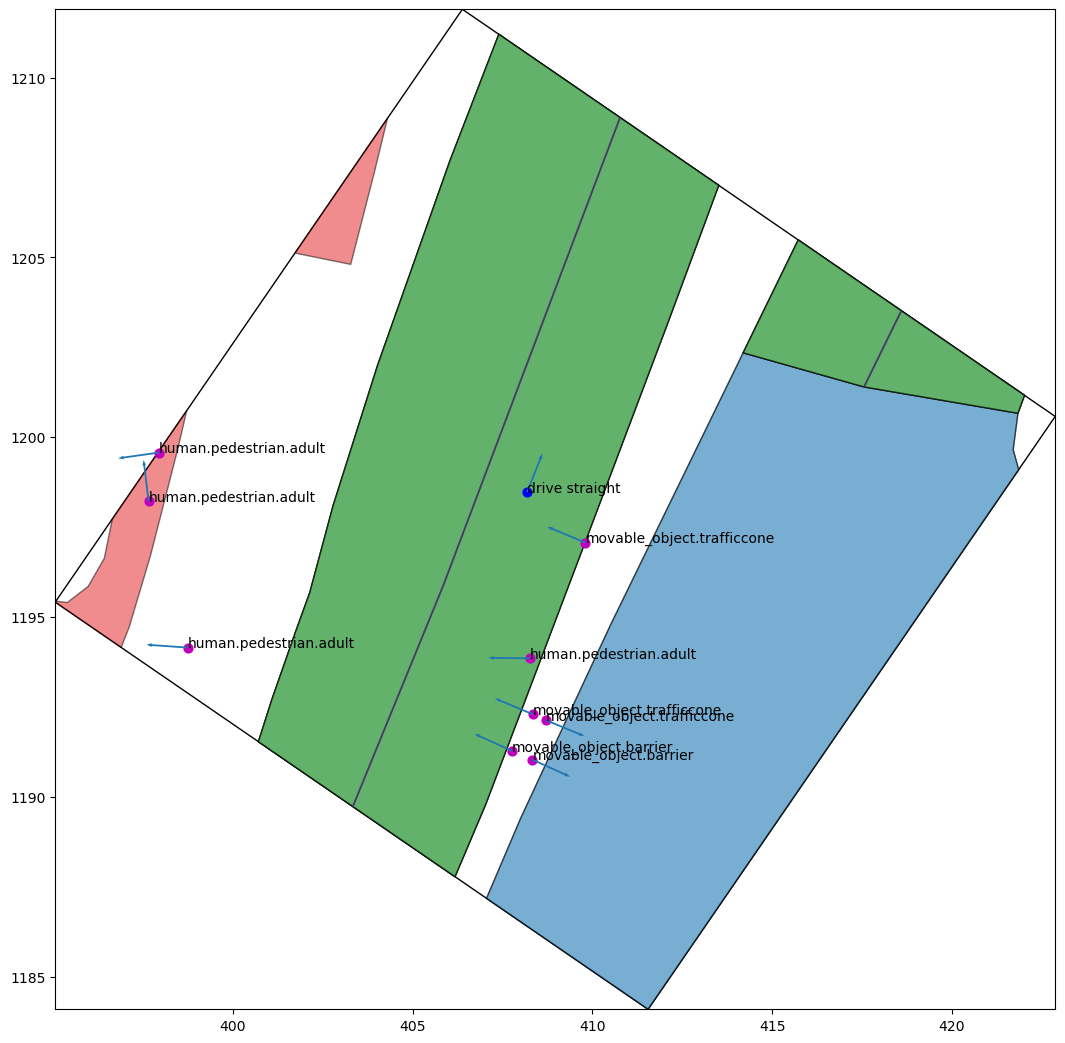

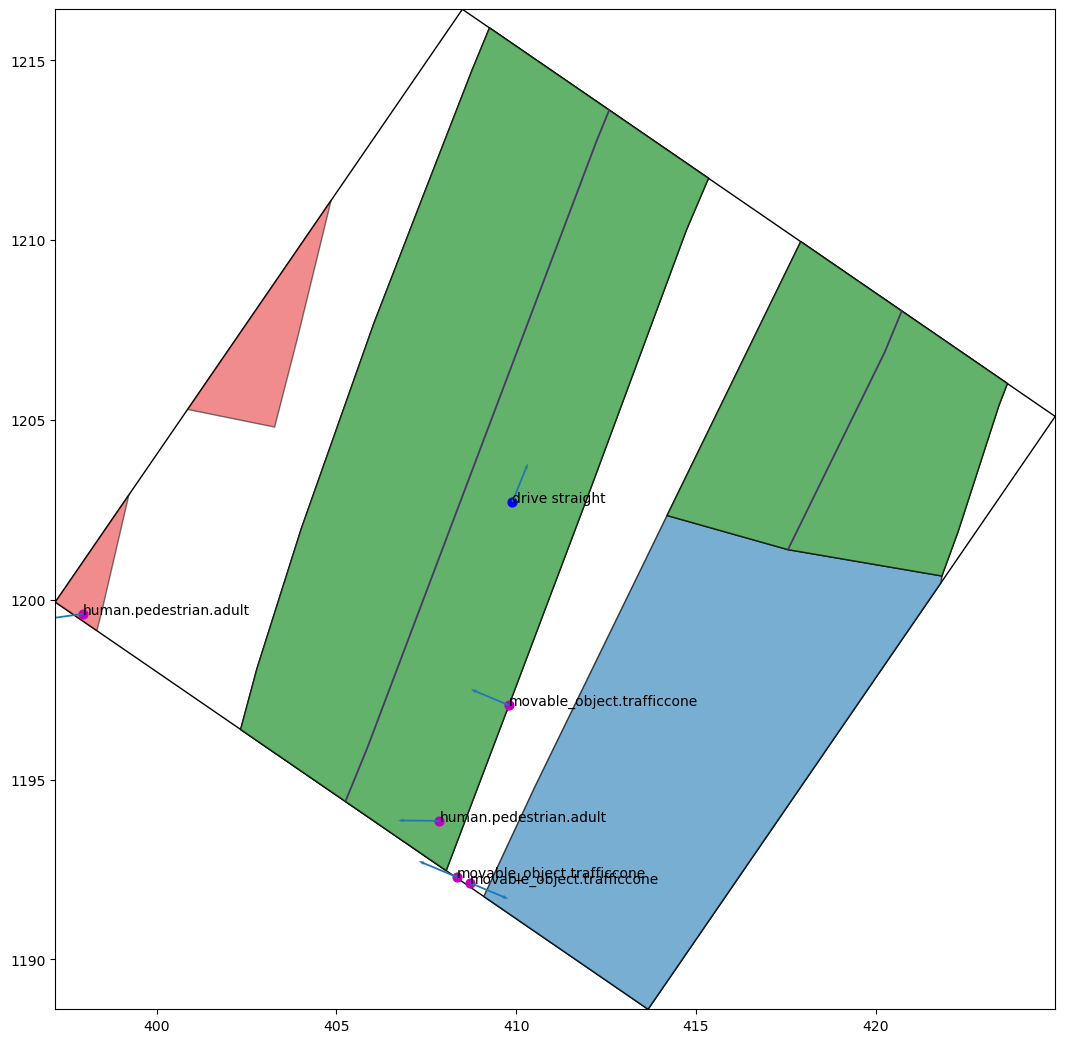

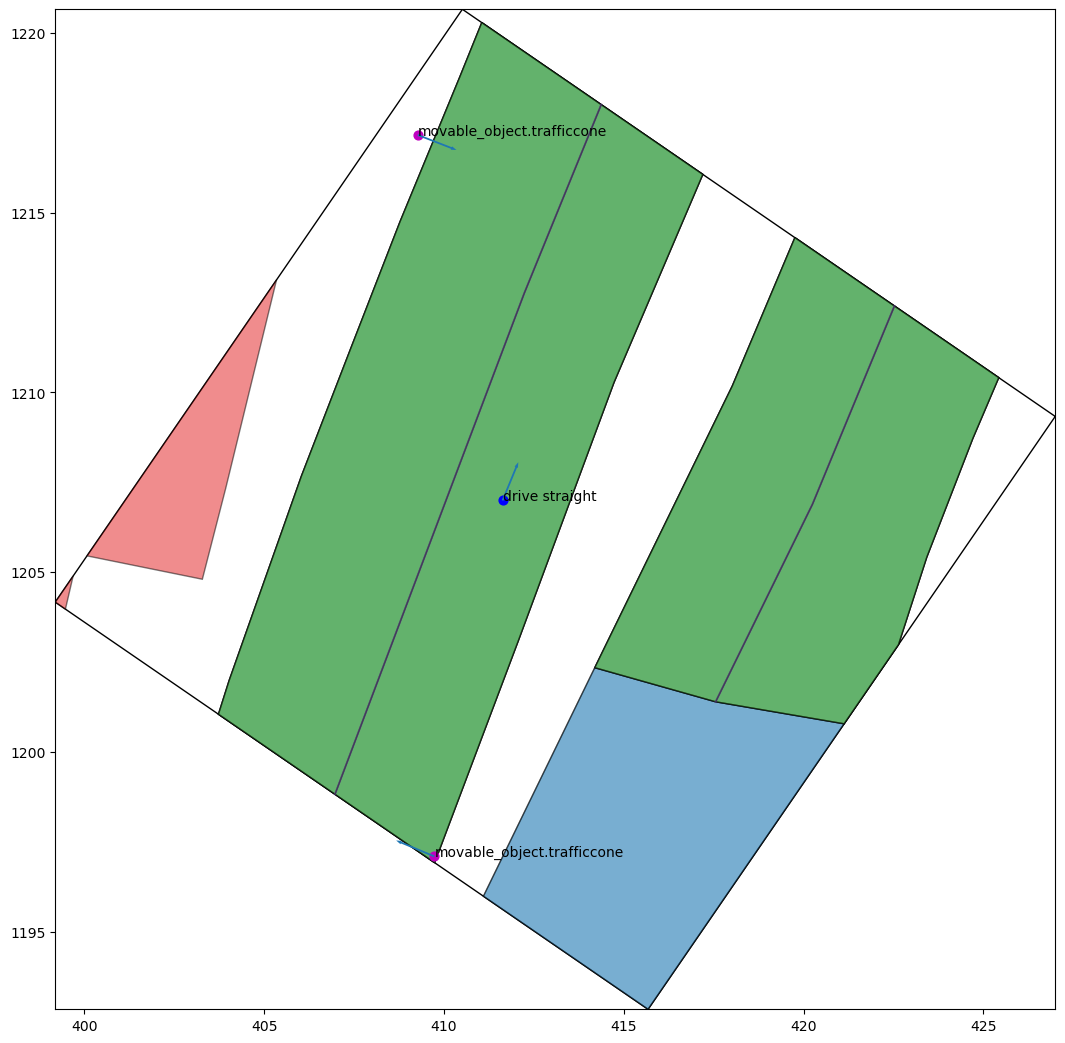

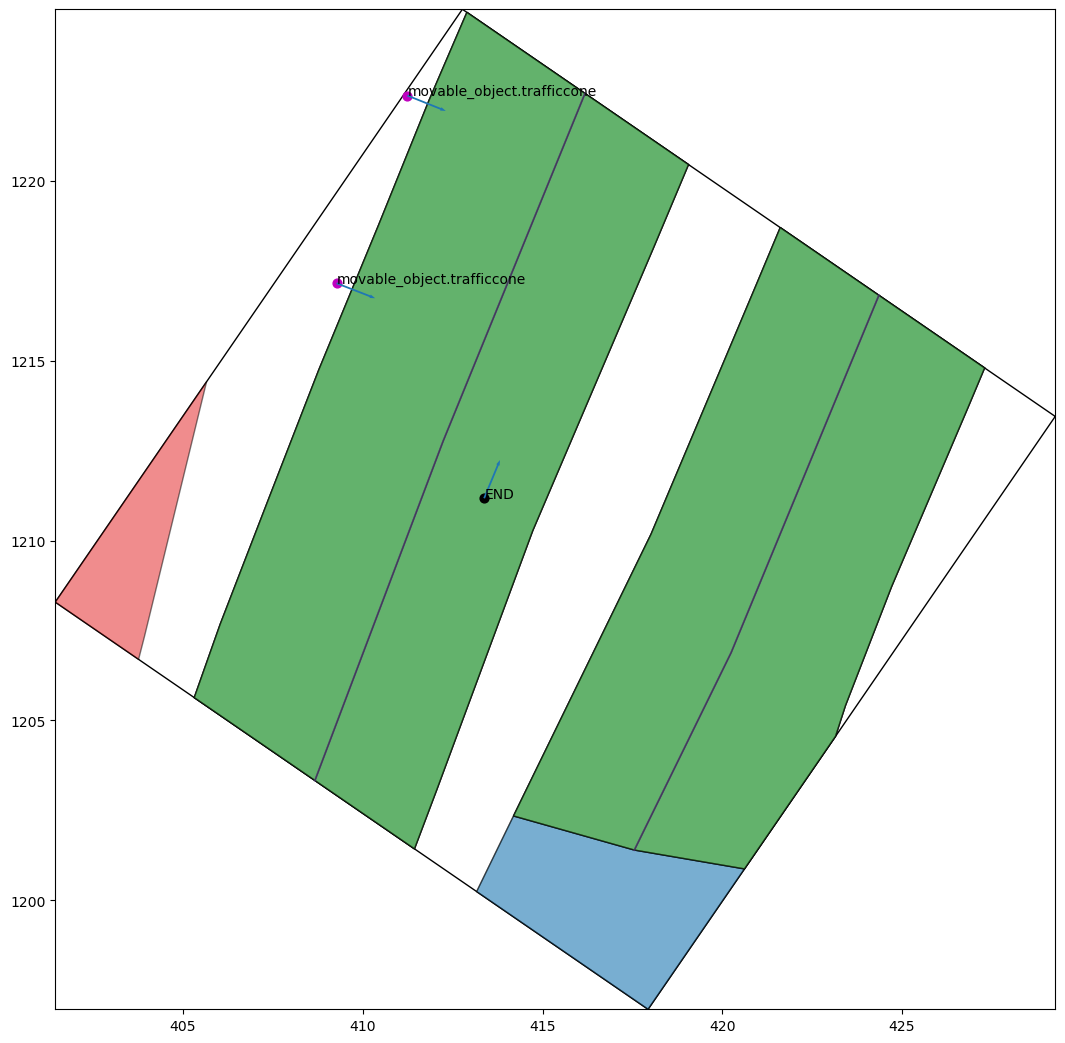

In [3]:
traj = 10

nusc_data = NuScenesSimple(data_path, [str(i) for i in range(128)])
render_trajectory('test_traj.gif', nusc_data[traj])